# **Universidad Industrial de Santander**
# **Inteligencia Artificial I**


## Proyecto Final

### Integrantes:


*   Santiago Mauricio Caicedo Rodríguez - 2220035
*   Ana Gabriela Hernández Peña - 2220091
*   Carlos Mateo Vera Grimaldo - 2220027


---
# **MODELO PREDICTIVO DEL ESTADO DE SALUD NEONATAL EN EMBARAZOS ADOLESCENTES Y LA CLASIFICACIÓN DEL TIPO DE PARTO**
### Conjunto de datos: [Embarazo Adolescente 2010 a 2016](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Embarazo-Adolescente-2010-A-2016/qdrx-m7nw/about_data)
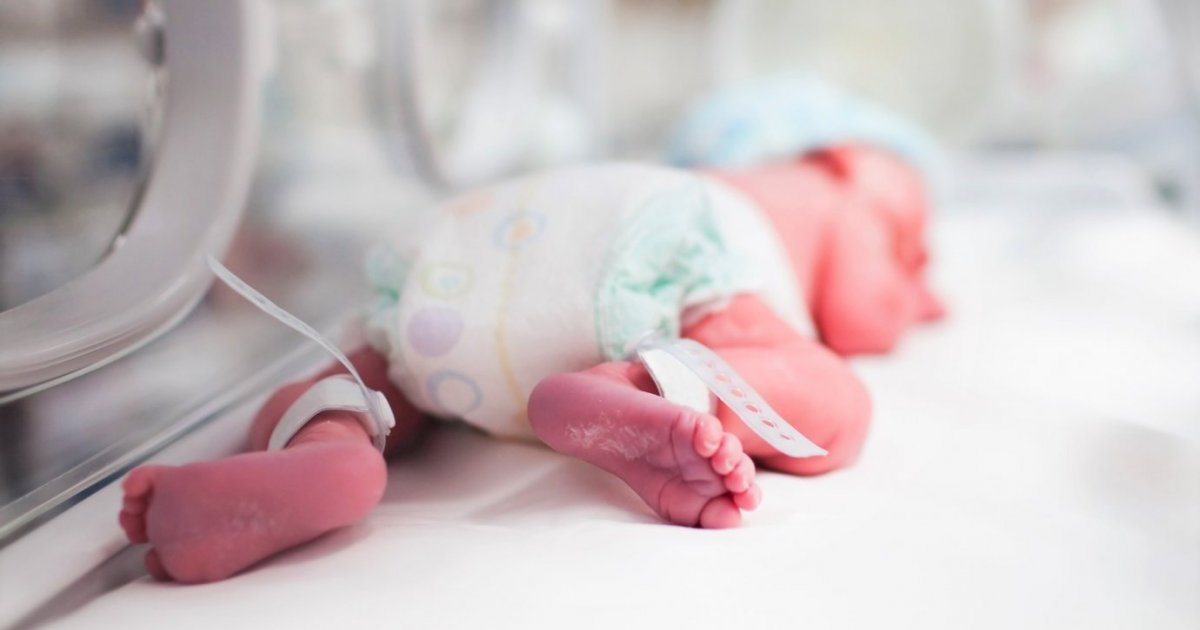

# **Contenidos**
1. [Introducción](#eje1)
2. [Objetivos](#eje7)
3. [Visualización del dataset](#eje2)
4. [Limpieza del conjunto de datos](#eje3)
5. [Estadísticas descriptivas del dataset](#eje4)
6. [Columnas para clasificación y regresión](#eje5)
7. [Elaboración de gráficas](#eje6)



# **INTRODUCCIÓN** <a name="eje1"></a>
En el presente estudio, se aborda un análisis completo de un conjunto de datos relacionado con embarazos adolescentes en áreas de Colombia, recopilado entre los años 2010 y 2016. Este dataset constituye una valiosa fuente de información para la investigación en el ámbito de la salud pública y la educación sexual, permitiendo una evaluación profunda de las tendencias y factores asociados con el fenómeno del embarazo en adolescentes durante el periodo mencionado.

El objetivo principal de este trabajo es aplicar modelos de inteligencia artificial, específicamente regresión y clasificación, para extraer conclusiones significativas a partir de las variables contenidas en el dataset. La metodología de regresión se empleará para modelar y predecir variables continuas relacionadas con los embarazos adolescentes, mientras que las técnicas de clasificación se utilizarán para categorizar y segmentar los datos en función de características específicas.



# **OBJETIVOS** <a name="eje7"></a>

**Objetivo General:**

Identificar las implicaciones del área residencial de la madre en los puntajes Apgar de neonatos de embarazos adolescentes, utilizando técnicas de regresión y clasificación para analizar los resultados de las valoraciones Apgar1 y Apgar2.

**Objetivos Específicos:**

1. Realizar un análisis de regresión sobre los puntajes Apgar1 y Apgar2 para explorar la relación entre estos puntajes y diversos factores, incluyendo el área residencial de la madre.

2. Desarrollar un modelo de clasificación para categorizar el área residencial de la madre (urbana, rural o semirural) y evaluar su impacto en los puntajes Apgar, identificando patrones de riesgo asociados.

3. Interpretar los resultados obtenidos de los modelos predictivos para comprender cómo el área de residencia de la madre podría influir en la salud neonatal, reflejada en los puntajes Apgar.

A continuación se realiza el importe de las librerías a utilizar a lo largo de la implementación del proyecto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **VISUALIZACIÓN DEL DATASET INICIAL** <a name="eje2"></a>

Como primer paso, a continuación se encuentra el dataset sin procesar.

In [2]:
df = pd.read_csv('/content/drive/MyDrive//Embarazo_Adolescente_2010_A_2016_20240916.csv')

print(df.shape)
df.head()

(8603, 51)


,COD_DPTO,COD_MUNIC,AREANAC,COD_INSP,SIT_PARTO,OTRO_SIT,NOM_INST,COD_INST,SEXO,PESO_NAC,...,SEG_SOCIAL,IDCLASADMI,NOMCLASAD,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,IDDEPTOEXP,IDMUNICEXP,FECHA_EXP
0,17,1,1,NaN,1,NaN,CLIN═CA VERSALLES S.A,1.700100e+11,2,2850,...,2,2.0,CAPRECOM - CAJA DE PREVISION SOCIAL DE COMUNIC...,16,99,99,1,17,1,10/26/2010
1,17,1,1,NaN,1,NaN,HERMANAS DE LA CARIDAD DOMINICAS DE LA PRESENT...,1.700101e+11,1,3110,...,1,1.0,SALUDCOOP - ENTIDAD PROMOTORA DE SALUD ORGANIS...,30,4,99,1,17,1,07/17/2010
2,17,1,1,NaN,1,NaN,SERVICIOS ESPECIALES DE SALUD,1.700100e+11,1,2850,...,2,2.0,CAPRECOM - CAJA DE PREVISION SOCIAL DE COMUNIC...,19,4,11,1,17,1,04/18/2010
3,17,1,1,NaN,1,NaN,SERVICIOS ESPECIALES DE SALUD,1.700100e+11,2,3040,...,2,2.0,CALISALUD - ENTIDAD PROMOTORA DE SALUD,22,99,99,1,17,1,05/17/2010
4,17,1,1,NaN,1,NaN,CLINICA SAN CAYETANO,1.700101e+11,2,2400,...,2,2.0,COOSALUD E.S.S. ARS - COOPERATIVA EMPRESA SOLI...,25,99,99,1,17,1,02/14/2010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_DPTO    8603 non-null   int64  
 1   COD_MUNIC   8603 non-null   int64  
 2   AREANAC     8603 non-null   int64  
 3   COD_INSP    92 non-null     float64
 4   SIT_PARTO   8603 non-null   int64  
 5   OTRO_SIT    20 non-null     object 
 6   NOM_INST    8580 non-null   object 
 7   COD_INST    8580 non-null   float64
 8   SEXO        8603 non-null   int64  
 9   PESO_NAC    8603 non-null   int64  
 10  TALLA_NAC   8603 non-null   int64  
 11  FECHA_NAC   8603 non-null   object 
 12  ANO         8603 non-null   int64  
 13  MES         8603 non-null   int64  
 14  HORA        8603 non-null   int64  
 15  MINUTOS     8603 non-null   int64  
 16  ATEN_PAR    8603 non-null   int64  
 17  OTRPARATX   20 non-null     object 
 18  T_GES       8603 non-null   int64  
 19  NUMCONSUL   8603 non-null  

# **LIMPIEZA DEL DATASET** <a name="eje3"></a>

A continuación, se eliminan columnas cuya relevancia no tiene aplicabilidad dentro del alcance del proyecto.

In [4]:
df = df.drop(columns=['COD_INSP', 'OTRO_SIT','NOM_PUEB','VEREDAMAD', 'BARRMADRE', 'OTRPARATX', 'SIT_PARTO', 'NOM_INST','ANO' , 'MES','HORA' , 'MINUTOS','FECHA_NACM', 'ATEN_PAR',
                                 'NUMCONSUL', 'MUL_PARTO', 'ULTCURMAD', 'ULTCURPAD', 'CODPRES','CODPTORE','CODMUNRE', 'NOMCLASAD', 'FECHA_EXP', 'IDHEMOCLAS', 'IDFACTORRH',
                                 'IDPUEBLOIN', 'COD_MUNIC', 'COD_INST', 'AREANAC', 'IDCLASADMI', 'IDDEPTOEXP', 'IDMUNICEXP'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_DPTO    8603 non-null   int64  
 1   SEXO        8603 non-null   int64  
 2   PESO_NAC    8603 non-null   int64  
 3   TALLA_NAC   8603 non-null   int64  
 4   FECHA_NAC   8603 non-null   object 
 5   T_GES       8603 non-null   int64  
 6   TIPO_PARTO  8603 non-null   int64  
 7   APGAR1      8581 non-null   float64
 8   APGAR2      8581 non-null   float64
 9   EDAD_MADRE  8603 non-null   int64  
 10  EST_CIVM    8603 non-null   int64  
 11  NIV_EDUM    8603 non-null   int64  
 12  AREA_RES    8603 non-null   int64  
 13  N_HIJOSV    8603 non-null   int64  
 14  N_EMB       8603 non-null   int64  
 15  SEG_SOCIAL  8603 non-null   int64  
 16  EDAD_PADRE  8603 non-null   int64  
 17  NIV_EDUP    8603 non-null   int64  
 18  PROFESION   8603 non-null   int64  
dtypes: float64(2), int64(16), o

Teniendo en cuenta que, en algunas columnas del conjunto de datos se maneja un código de tipo entero para identificar los valores que no se conocen, con el fin de obtener un comportamiento viable en las gráficas, se reemplazan por 0.

In [5]:
df['NIV_EDUM'] = df['NIV_EDUM'].replace(99, 0)
df['NIV_EDUM'] = df['NIV_EDUM'].replace(13, 10)
df['APGAR1'] = df['APGAR1'].replace(99, 0)
df['APGAR2'] = df['APGAR2'].replace(99, 0)
df['NIV_EDUP'] = df['NIV_EDUP'].replace(99, 0)
df['EDAD_PADRE'] = df['EDAD_PADRE'].replace(99, 0)
df['EDAD_MADRE'] = df['EDAD_MADRE'].replace(99, 0)

Finalmente, se eliminan las columnas cuyo contenido incluya valores nulos o de tipo NaN (Not a Number).

In [6]:
df = df.dropna()
print(df.shape)
df.head()

(8581, 19)


,COD_DPTO,SEXO,PESO_NAC,TALLA_NAC,FECHA_NAC,T_GES,TIPO_PARTO,APGAR1,APGAR2,EDAD_MADRE,EST_CIVM,NIV_EDUM,AREA_RES,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,PROFESION
0,17,2,2850,45,10/25/2010,39,2,7.0,10.0,16,5,2,1,1,1,2,16,0,1
1,17,1,3110,50,07/17/2010,39,2,8.0,10.0,15,2,2,1,1,1,1,30,4,1
2,17,1,2850,50,04/18/2010,39,1,8.0,10.0,16,2,3,1,1,1,2,19,4,1
3,17,2,3040,50,05/17/2010,40,1,8.0,10.0,16,5,3,1,1,1,2,22,0,1
4,17,2,2400,48,02/14/2010,40,1,8.0,10.0,17,2,2,1,1,1,2,25,0,1


# **ESTADÍSTICAS DESCRIPTIVAS DEL DATASET** <a name="eje4"></a>

Mediante el método en cuestión, se calculan algunas estadísticas respecto a cada una de las columnas electas.

In [7]:
df.describe()

,COD_DPTO,SEXO,PESO_NAC,TALLA_NAC,T_GES,TIPO_PARTO,APGAR1,APGAR2,EDAD_MADRE,EST_CIVM,NIV_EDUM,AREA_RES,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,PROFESION
count,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000,8581.000000
mean,18.765412,1.490269,3120.906421,48.883230,38.631045,1.209882,7.686517,9.536068,16.075050,3.336091,2.982753,1.653886,1.064328,1.092413,1.861904,21.869363,2.805967,1.003729
std,9.347081,0.499934,537.060919,3.339371,2.713943,0.437864,1.143479,0.990402,1.007875,1.777833,0.916531,0.884208,0.255132,0.322019,0.681538,6.613194,2.073417,0.118204
min,5.000000,1.000000,360.000000,20.000000,20.000000,1.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,17.000000,1.000000,2860.000000,48.000000,38.000000,1.000000,8.000000,9.000000,15.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,19.000000,2.000000,1.000000
50%,17.000000,1.000000,3140.000000,49.000000,39.000000,1.000000,8.000000,10.000000,16.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,21.000000,3.000000,1.000000
75%,17.000000,2.000000,3415.000000,50.000000,40.000000,1.000000,8.000000,10.000000,17.000000,5.000000,3.000000,3.000000,1.000000,1.000000,2.000000,24.000000,4.000000,1.000000
max,76.000000,2.000000,9999.000000,99.000000,99.000000,4.000000,10.000000,10.000000,17.000000,9.000000,10.000000,3.000000,3.000000,7.000000,5.000000,80.000000,13.000000,5.000000


A continuación, se encuentra una breve descripción acerca de los cálculos estadísticos aplicados:
*   **count:** Número de valores no nulos.
*   **mean:** Media aritmética de los datos.
*   **std:** Desviación estándar, que indica qué tan dispersos están los datos respecto a la media.
*   **min (Mínimo):**  Valor más pequeño de la columna, es decir, el valor mínimo que aparece en los datos.
*   **25% (Percentil 25, también llamado primer cuartil):** Valor debajo del cual se encuentra el 25% de los datos. En otras palabras, el 25% de los datos es menor o igual a este valor, y el 75% es mayor.
*   **50% (Percentil 50, también conocido como la mediana):**  Valor debajo del cual se encuentra el 50% de los datos. En otras palabras, es la mediana, y representa el valor "central" de la distribución.
*   **75% (Percentil 75, también llamado tercer cuartil):**  Valor debajo del cual se encuentra el 75% de los datos. El 75% de los datos es menor o igual a este valor, y el 25% es mayor.
*   **max (Máximo):** Valor más grande de la columna, es decir, el valor máximo que aparece en los datos.



# **COLUMNAS PARA REGRESIÓN Y CLASIFICACIÓN** <a name="eje5"></a>

## **COLUMNAS CANDIDATAS PARA REGRESIÓN Y CLASIFICACIÓN**

Para determinar el tratamiento adecuado de cada variable en un modelo de IA, es importante considerar la naturaleza de la variable y el tipo de análisis que se desea realizar.
### **Variables para Regresión**

1. **PESO_NAC (Peso al nacer)**:
   - **Descripción**: Variable continua que mide el peso del recién nacido en gramos.
   - **Razonamiento**: El peso al nacer es una variable numérica continua que puede tener una amplia gama de valores. Los modelos de regresión son adecuados para predecir variables continuas y manejar la variabilidad en los datos.

2. **TALLA_NAC (Talla al nacer)**:
   - **Descripción**: Variable continua que mide la altura del recién nacido en centímetros.
   - **Razonamiento**: Similar a **PESO_NAC**, la talla al nacer es una variable continua. Los modelos de regresión pueden ser utilizados para predecir esta variable basada en otras características.

3. **APGAR1 (Puntuación APGAR al minuto 1)**:
   - **Descripción**: Variable continua que mide la puntuación APGAR (un test para evaluar la salud del recién nacido) al primer minuto de vida.
   - **Razonamiento**: Esta puntuación es una medida continua que puede variar dentro de un rango. Los modelos de regresión son apropiados para predecir este tipo de variable continua.

4. **APGAR2 (Puntuación APGAR al minuto 5)**:
   - **Descripción**: Similar a **APGAR1**, pero medida al quinto minuto.
   - **Razonamiento**: Al igual que **APGAR1**, es una variable continua y, por lo tanto, adecuada para modelos de regresión.

### **Variables para Clasificación**

1. **COD_DPTO (Código del departamento)**:
   - **Descripción**: Identificador numérico para diferentes departamentos.
   - **Razonamiento**: Aunque es numérica, esta variable probablemente representa categorías distintas (departamentos). Puede ser transformada en una variable categórica para clasificación, como predecir el departamento basado en otras características.

2. **AREA_RES (Área de residencia)**:
   - **Descripción**: Código o identificador para diferentes áreas de residencia.
   - **Razonamiento**: Similar a **COD_DPTO**, esta variable probablemente categoriza áreas y puede ser utilizada en modelos de clasificación para predecir el área de residencia.

3. **SEXO (Sexo del individuo)**:
   - **Descripción**: Variable categórica que indica el sexo del individuo (por ejemplo, masculino o femenino).
   - **Razonamiento**: Es una variable categórica binaria y se presta bien a modelos de clasificación para predecir el sexo basado en otras características.

4. **TIPO_PARTO (Tipo de parto)**:
   - **Descripción**: Tipo de parto (por ejemplo, vaginal o cesárea).
   - **Razonamiento**: Es una variable categórica con varias categorías posibles. Los modelos de clasificación pueden predecir el tipo de parto basado en otras variables.

5. **EST_CIVM (Estado civil de la madre)**:
   - **Descripción**: Estado civil de la madre (por ejemplo, soltera, casada).
   - **Razonamiento**: Variable categórica que puede ser utilizada en modelos de clasificación para predecir el estado civil de la madre basado en otras características.

6. **NIV_EDUM (Nivel educativo de la madre)**:
   - **Descripción**: Nivel educativo de la madre (por ejemplo, primaria, secundaria, terciaria).
   - **Razonamiento**: Es una variable categórica ordinal que clasifica el nivel educativo. Los modelos de clasificación pueden predecir el nivel educativo basado en otras variables.

7. **SEG_SOCIAL (Sistema de seguridad social)**:
   - **Descripción**: Tipo de sistema de seguridad social al que está afiliado el individuo.
   - **Razonamiento**: Esta variable es categórica y puede ser usada para clasificación, por ejemplo, para predecir el tipo de seguro social basado en otras características.

8. **EDAD_PADRE (Edad del padre)**:
   - **Descripción**: Edad del padre.
   - **Razonamiento**: Aunque es numérica, en el contexto de clasificación, se puede categorizar esta variable en rangos de edad para predecir ciertas categorías o comportamientos asociados con diferentes grupos de edad.

9. **FECHA_NAC (Fecha de nacimiento)**:
   - **Descripción**: Representa la fecha de nacimiento de los individuos en el dataset, almacenada en formato datetime (e.g., dd/mm/yyyy).
   - **Razonamiento**: Puede ser transformada en características numéricas, como la edad, el mes y el año. La edad es crucial para identificar patrones de embarazo en adolescentes, mientras que los componentes temporales pueden revelar tendencias estacionales y cohortes de edad. Estos datos permiten realizar análisis detallados y segmentaciones que ayudan a entender mejor los factores asociados con los embarazos adolescentes.



### **Conclusión**

La elección entre **regresión** y **clasificación** depende de la naturaleza de la variable dependiente (o objetivo):

- **Regresión** se utiliza para predecir variables continuas, es decir, valores numéricos que pueden tomar cualquier valor dentro de un rango.
- **Clasificación** se utiliza para predecir variables categóricas, es decir, variables que representan categorías o clases.

Para las variables continuas como **PESO_NAC**, **TALLA_NAC**, **APGAR1**, **APGAR2**, y **EDAD_MADRE**, se opta por la **regresión** porque estas variables tienen un rango continuo de valores.

Para las variables categóricas como **COD_DPTO**, **AREA_RES**, **SEXO**, **TIPO_PARTO**, **EST_CIVM**, **NIV_EDUM**, **SEG_SOCIAL**, **FECHA_NAC**, y **EDAD_PADRE**, se opta por la **clasificación** para categorizar o predecir clases específicas basadas en otras variables.

## **COLUMNAS ELECTAS PARA REGRESIÓN Y CLASIFICACIÓN**


Se seleccionaron las columnas **APGAR1** y **APGAR2** para realizar un análisis de **regresión**, ya que ambas variables miden el estado de salud del recién nacido en los primeros minutos de vida. Estas variables numéricas, que evalúan aspectos como la frecuencia cardíaca, respiración y tono muscular, son idóneas para un modelo de regresión que permita predecir o analizar su comportamiento en función de otros factores.

Por otro lado, la columna **AREA_RES** (referente a la localización de la vivienda de la madre), fue elegida para aplicar un modelo de clasificación, debido a que es una variable categórica con tres clases (rural, urbana y semirural).

La idea central del proyecto es analizar cómo varían los puntajes de APGAR1 y APGAR2 en función del área residencial propia de la madre, identificando posibles patrones o diferencias en los resultados de salud iniciales de los bebés.

# **ELABORACIÓN DE GRÁFICAS** <a name="eje6"></a>

**COLUMNA 0: COD_DPTO**

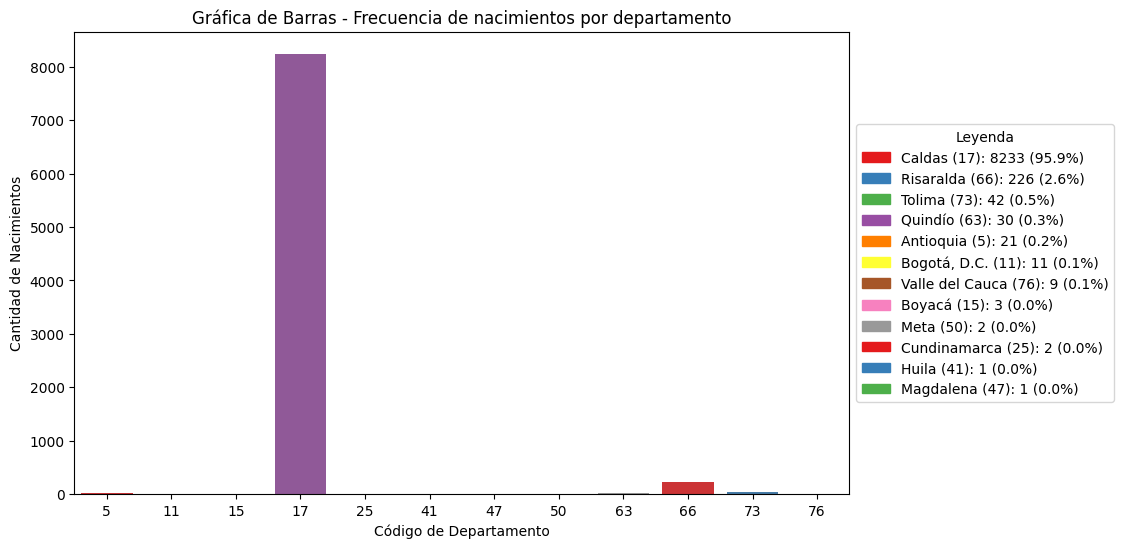

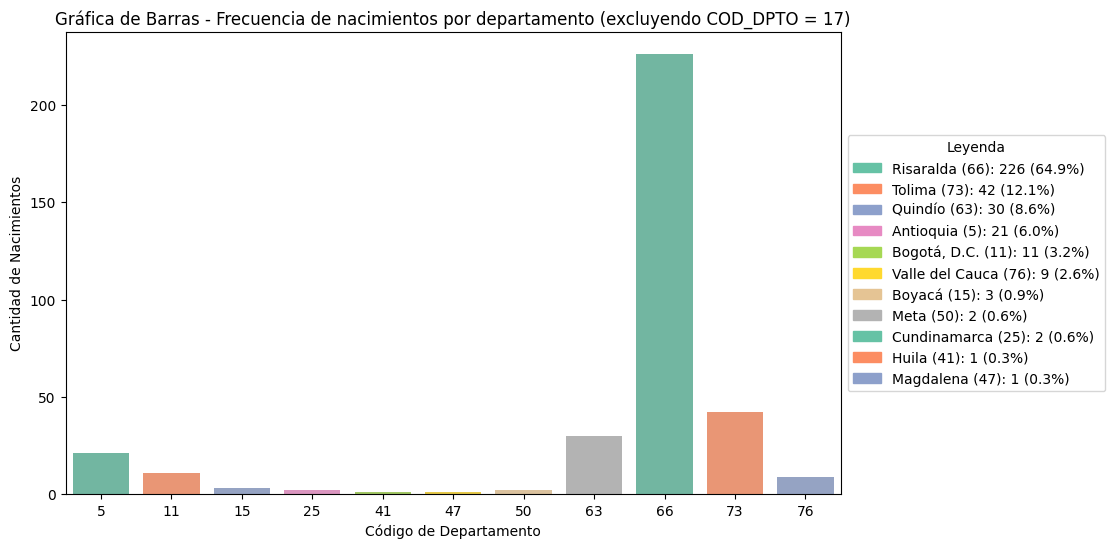

In [ ]:
freq_table = df['COD_DPTO'].value_counts().reset_index()
freq_table.columns = ['COD_DPTO', 'Frecuencia']
freq_table['Porcentaje'] = 100 * freq_table['Frecuencia'] / freq_table['Frecuencia'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("Set1", len(freq_table))
sns.barplot(data=freq_table, x='COD_DPTO', y='Frecuencia', ax=ax, palette=colors, hue='COD_DPTO', dodge=False, legend=False)
ax.set_title('Gráfica de Barras - Frecuencia de nacimientos por departamento')
ax.set_xlabel('Código de Departamento')
ax.set_ylabel('Cantidad de Nacimientos')
codigos_departamentos = {"5": "Antioquia", "08": "Atlántico", "11": "Bogotá, D.C.", "13": "Bolívar", "15": "Boyacá", "17": "Caldas", "18": "Caquetá", "19": "Cauca", "20": "Cesar", "23": "Córdoba", "25": "Cundinamarca", "27": "Chocó", "41": "Huila", "44": "La Guajira", "47": "Magdalena", "50": "Meta", "52": "Nariño", "54": "Norte de Santander", "63": "Quindío", "66": "Risaralda", "68": "Santander", "70": "Sucre", "73": "Tolima", "76": "Valle del Cauca", "81": "Arauca", "85": "Casanare", "86": "Putumayo", "88": "Archipiélago de San Andrés, Providencia y Santa Catalina", "91": "Amazonas", "94": "Guainía", "95": "Guaviare", "97": "Vaupés", "99": "Vichada"}
legend_labels = [
    f'{codigos_departamentos.get(str(int(label)), "Desconocido")} ({int(label)}): {freq} ({perc:.1f}%)'
    for label, freq, perc in zip(freq_table['COD_DPTO'], freq_table['Frecuencia'], freq_table['Porcentaje'])
]

# Crear los handles de la leyenda
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_handles, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

df_filtered = df[df['COD_DPTO'] != 17]
freq_table = df_filtered['COD_DPTO'].value_counts().reset_index()
freq_table.columns = ['COD_DPTO', 'Frecuencia']
freq_table['Porcentaje'] = 100 * freq_table['Frecuencia'] / freq_table['Frecuencia'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("Set2", len(freq_table))
sns.barplot(data=freq_table, x='COD_DPTO', y='Frecuencia', ax=ax, palette=colors, hue='COD_DPTO', dodge=False, legend=False)
ax.set_title('Gráfica de Barras - Frecuencia de nacimientos por departamento (excluyendo COD_DPTO = 17)')
ax.set_xlabel('Código de Departamento')
ax.set_ylabel('Cantidad de Nacimientos')

legend_labels = [
    f'{codigos_departamentos.get(str(int(label)), "Desconocido")} ({int(label)}): {freq} ({perc:.1f}%)'
    for label, freq, perc in zip(freq_table['COD_DPTO'], freq_table['Frecuencia'], freq_table['Porcentaje'])
]

# Crear los handles de la leyenda
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_handles, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))
plt.legend(handles=legend_handles, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

**COLUMNA 1: SEXO**

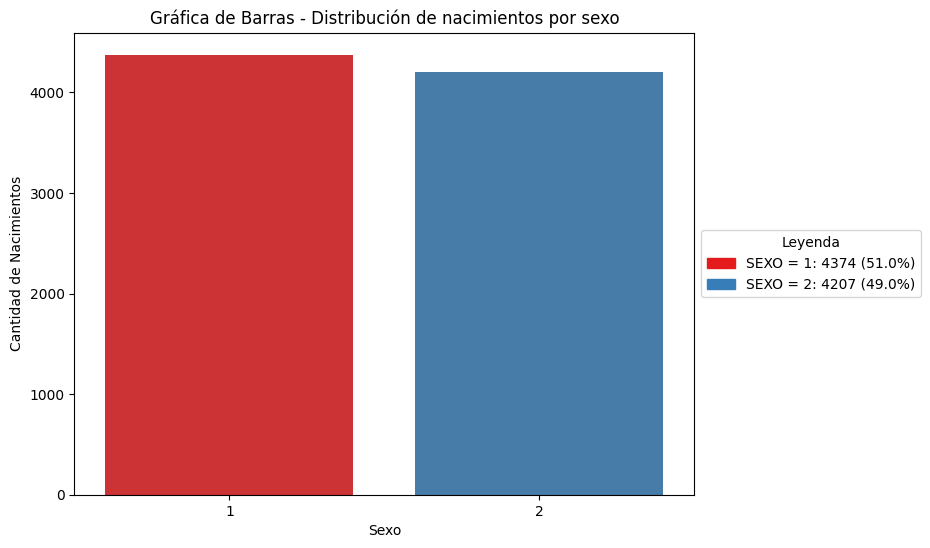

In [ ]:
freq_table = df['SEXO'].value_counts().reset_index()
freq_table.columns = ['SEXO', 'Frecuencia']
freq_table['Porcentaje'] = 100 * freq_table['Frecuencia'] / freq_table['Frecuencia'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Set1", len(freq_table))
sns.barplot(data=freq_table, x='SEXO', y='Frecuencia', ax=ax, palette=colors, hue='SEXO', dodge=False, legend=False)
ax.set_title('Gráfica de Barras - Distribución de nacimientos por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad de Nacimientos')


legend_labels = [f'SEXO = {int(label)}: {freq} ({perc:.1f}%)' for label, freq, perc in zip(freq_table['SEXO'], freq_table['Frecuencia'], freq_table['Porcentaje'])]
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]


plt.legend(handles=legend_handles, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

**COLUMNA 2: PESO_NAC**

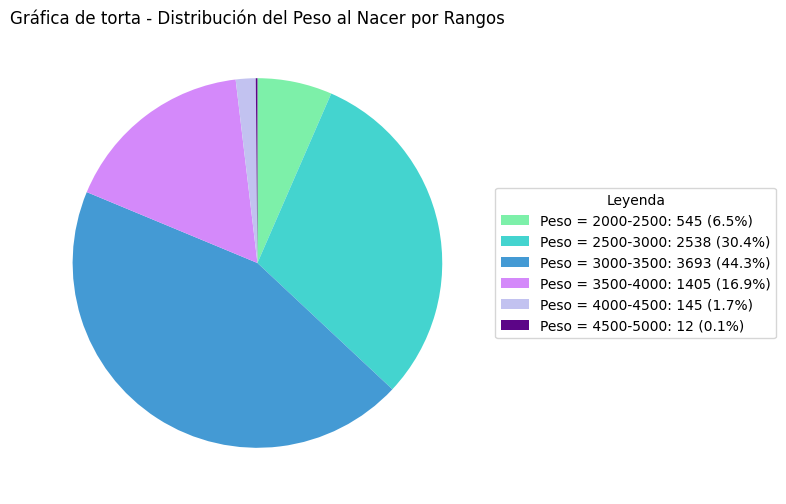

In [ ]:
bins = [2000, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ['2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000']
df['Rango_Peso'] = pd.cut(df['PESO_NAC'], bins=bins, labels=labels)

freq_table = df['Rango_Peso'].value_counts().sort_index()
percentages = 100 * freq_table / freq_table.sum()

colors = ['#7df0a9','#44d4cf','#449ad4','#d489fa', '#c2c2f0', '#5c0587']

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts = ax.pie(freq_table, colors=colors, startangle=90, counterclock=False)

legend_labels = [f'Peso = {label}: {freq} ({perc:.1f}%)' for label, freq, perc in zip(freq_table.index, freq_table, percentages)]

plt.legend(wedges, legend_labels, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))

ax.set_title('Gráfica de torta - Distribución del Peso al Nacer por Rangos')
plt.show()

**COLUMNA 3: TALLA_NAC**

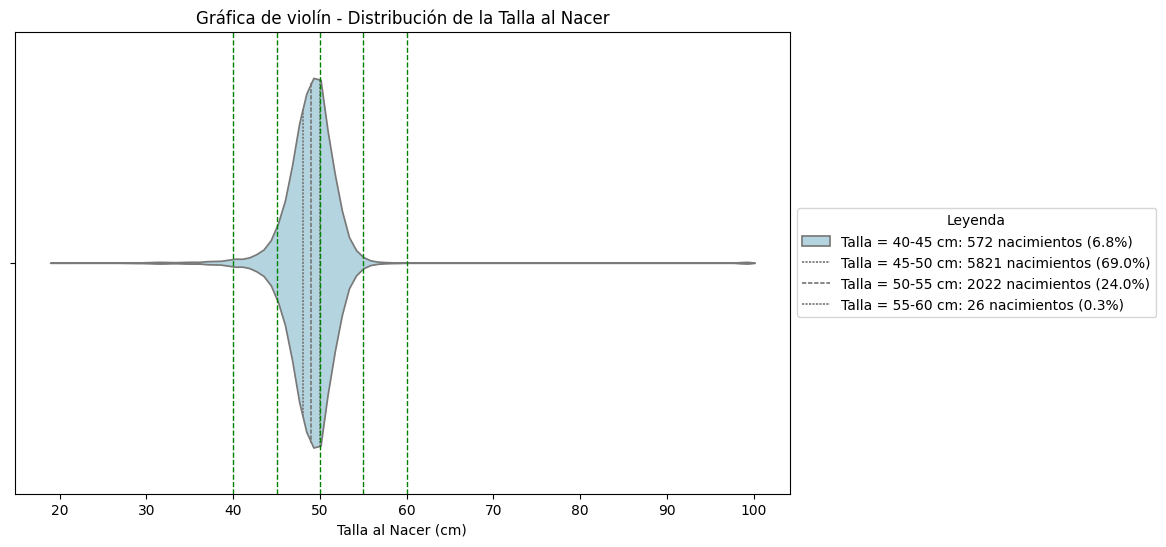

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x=df['TALLA_NAC'], color="lightblue", inner="quartile", ax=ax)
ax.set_title('Gráfica de violín - Distribución de la Talla al Nacer')
ax.set_xlabel('Talla al Nacer (cm)')

for x_value in [40, 45, 50, 55, 60]:
    ax.axvline(x=x_value, color='green', linestyle='--', linewidth=1)

bins = [40, 45, 50, 55, 60]
labels = ['40-45', '45-50', '50-55', '55-60']
df['Rango_Talla'] = pd.cut(df['TALLA_NAC'], bins=bins, labels=labels)

freq_table = df['Rango_Talla'].value_counts().sort_index()

percentages = 100 * freq_table / freq_table.sum()

legend_labels = [f'Talla = {label} cm: {freq} nacimientos ({perc:.1f}%)' for label, freq, perc in zip(freq_table.index, freq_table.values, percentages)]

plt.legend(legend_labels, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

**COLUMNA 4: FECHA_NAC**

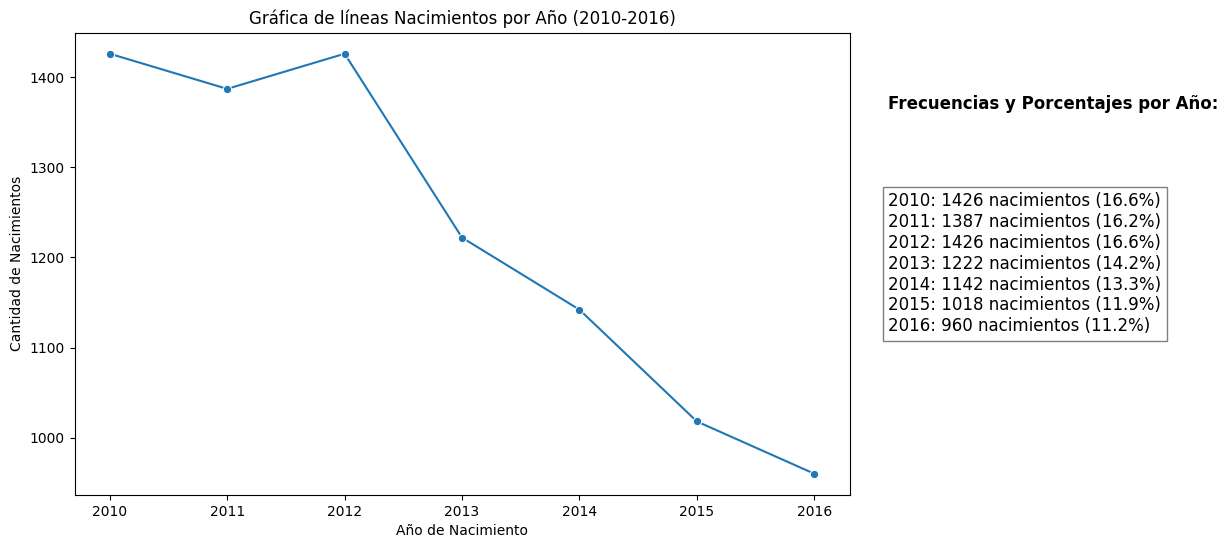

In [ ]:
df['FECHA_NAC'] = pd.to_datetime(df['FECHA_NAC'])

df['Año_Nac'] = df['FECHA_NAC'].dt.year

years_to_include = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
filtered_data = df[df['Año_Nac'].isin(years_to_include)]

freq_table = filtered_data['Año_Nac'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=freq_table.index, y=freq_table.values, ax=ax, marker='o')
ax.set_title('Gráfica de líneas Nacimientos por Año (2010-2016)')
ax.set_xlabel('Año de Nacimiento')
ax.set_ylabel('Cantidad de Nacimientos')

percentages = 100 * freq_table / freq_table.sum()

table_title = 'Frecuencias y Porcentajes por Año:\n\n'
data_table = [f'{int(label)}: {freq} nacimientos ({perc:.1f}%)' for label, freq, perc in zip(freq_table.index, freq_table.values, percentages)]
data_text = "\n".join(data_table)

plt.text(1.05, 0.8, table_title, transform=ax.transAxes, fontsize=12, verticalalignment='center', color='black', weight='bold')

plt.text(1.05, 0.5, data_text, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

**COLUMNA 5: T_GES**

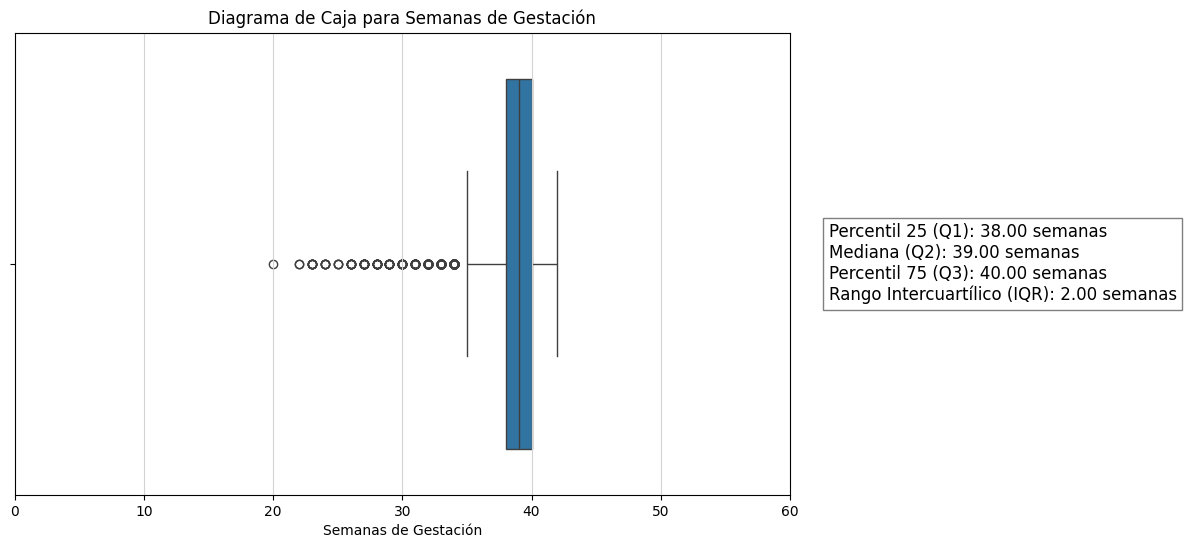

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['T_GES'], ax=ax)
ax.set_title('Diagrama de Caja - Semanas de Gestación')
ax.set_xlabel('Semanas de Gestación')

ax.set_xlim(0, 60)

q1 = df['T_GES'].quantile(0.25)
median = df['T_GES'].median()
q3 = df['T_GES'].quantile(0.75)
iqr = q3 - q1

for x_value in [10, 20, 30, 40, 50]:
    ax.axvline(x=x_value, color='lightgray', linestyle='-', linewidth=0.8)

data_table = [
    f'Percentil 25 (Q1): {q1:.2f} semanas',
    f'Mediana (Q2): {median:.2f} semanas',
    f'Percentil 75 (Q3): {q3:.2f} semanas',
    f'Rango Intercuartílico (IQR): {iqr:.2f} semanas'
]
data_text = "\n".join(data_table)

plt.text(1.05, 0.5, data_text, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

**COLUMNA 6: TIPO_PARTO**

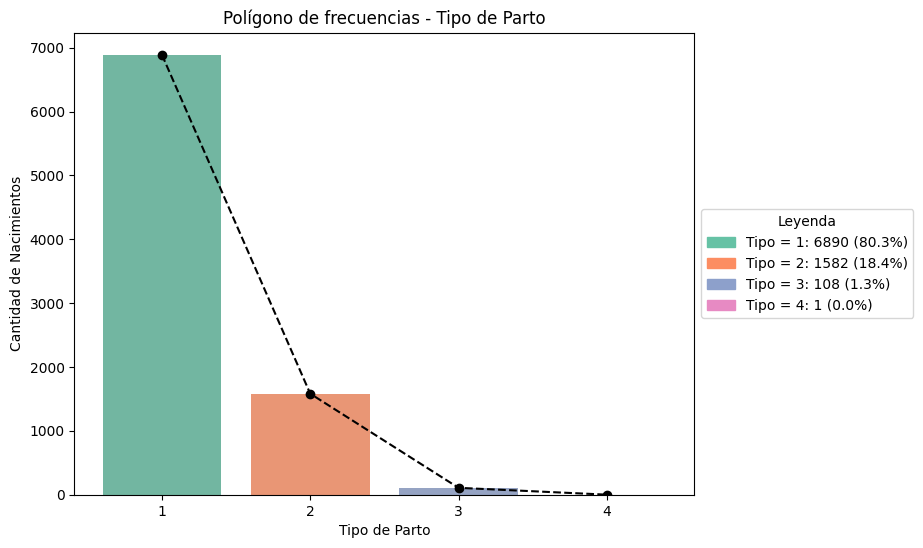

In [ ]:
freq_table = df['TIPO_PARTO'].value_counts().reset_index()
freq_table.columns = ['TIPO_PARTO', 'Frecuencia']
freq_table['Porcentaje'] = 100 * freq_table['Frecuencia'] / freq_table['Frecuencia'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Set2", len(freq_table))  # Usar paleta Set1 para diferentes colores
bars = sns.barplot(data=freq_table, x='TIPO_PARTO', y='Frecuencia', ax=ax, palette=colors, hue='TIPO_PARTO', dodge=False, legend=False)

ax.set_title('Polígono de frecuencias - Tipo de Parto')
ax.set_xlabel('Tipo de Parto')
ax.set_ylabel('Cantidad de Nacimientos')

legend_labels = [f'Tipo = {label}: {freq} ({perc:.1f}%)' for label, freq, perc in zip(freq_table['TIPO_PARTO'], freq_table['Frecuencia'], freq_table['Porcentaje'])]
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

plt.legend(handles=legend_handles, title="Leyenda", loc="center left", bbox_to_anchor=(1, 0.5))

bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars.patches]
frequencies = freq_table['Frecuencia']

ax.plot(bar_centers, frequencies, color='black', marker='o', linestyle='--')

plt.show()

**COLUMNA 7: APGAR1**

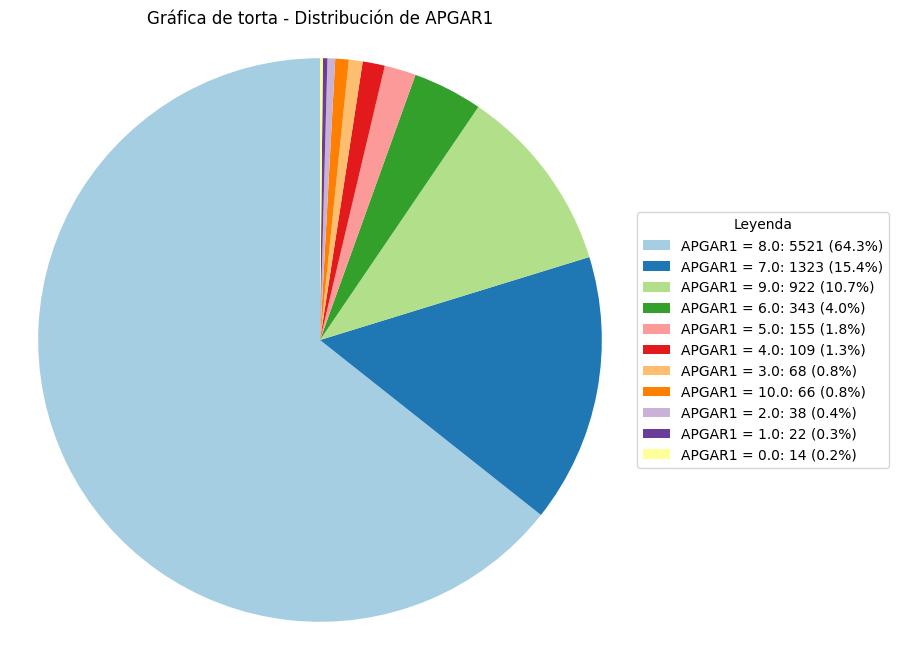

In [ ]:
apgar_counts = df['APGAR1'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(apgar_counts, startangle=90, colors=plt.cm.Paired.colors)

percentages = [f'{value} ({value/sum(apgar_counts)*100:.1f}%)' for value in apgar_counts]

plt.legend(wedges, [f'APGAR1 = {label}: {percentage}' for label, percentage in zip(apgar_counts.index, percentages)],
           title="Leyenda", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Gráfica de torta - Distribución de APGAR1')
plt.axis('equal')
plt.show()


**COLUMNA 8: APGAR2**

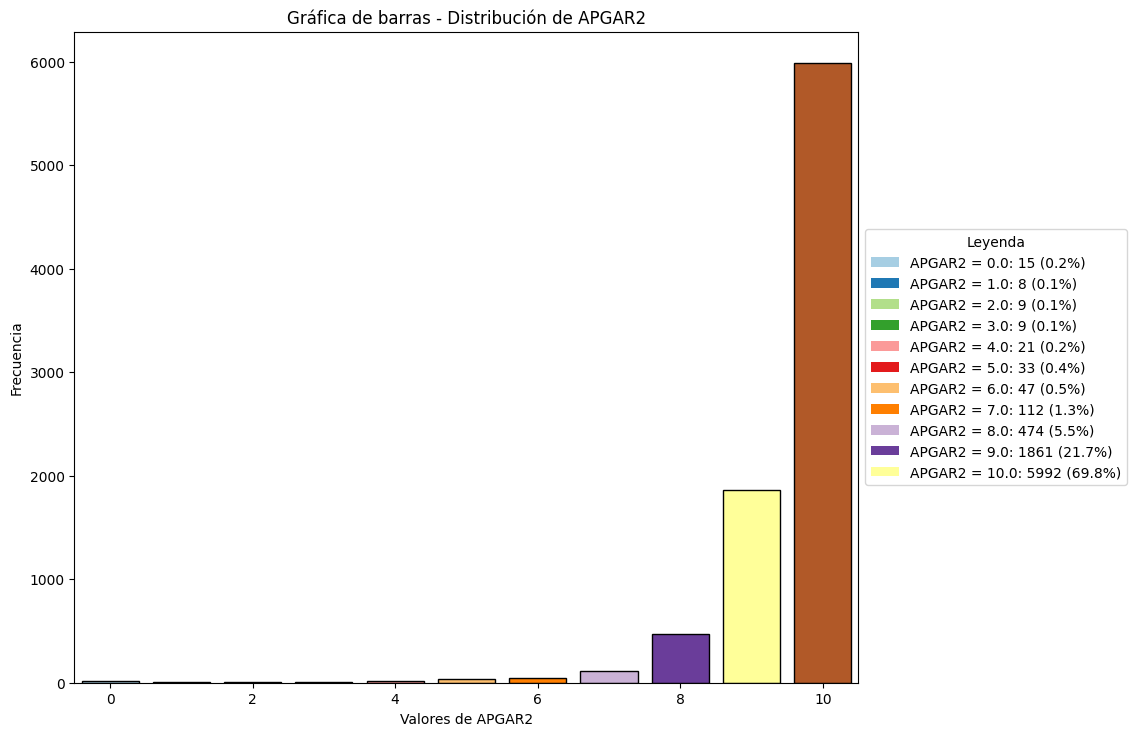

In [ ]:
apgar2_counts = df['APGAR2'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

x_values = np.arange(0, 11)
colors = plt.cm.Paired(np.linspace(0, 1, len(x_values)))


bars = plt.bar(apgar2_counts.index, apgar2_counts.values, color=[colors[i % len(colors)] for i in range(len(apgar2_counts))], edgecolor='black')

plt.xlim(-0.5, 10.5)

plt.title('Gráfica de barras - Distribución de APGAR2')
plt.xlabel('Valores de APGAR2')
plt.ylabel('Frecuencia')


percentages = [f'{value} ({value/sum(apgar2_counts)*100:.1f}%)' for value in apgar2_counts]


legend_labels = [f'Valor {label}: Frecuencia = {value}, {percentage}'
                 for label, value, percentage in zip(apgar2_counts.index, apgar2_counts, percentages)]


plt.legend(wedges, [f'APGAR2 = {label}: {percentage}' for label, percentage in zip(apgar2_counts.index, percentages)],
           title="Leyenda", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout(pad=3.0)

plt.show()

**COLUMNA 9: EDAD_MADRE**

Valores únicos:
[16 15 17 14 13 12 10 11]

Frecuencia de cada valor:
EDAD_MADRE
17    3685
16    2706
15    1485
14     577
13     113
12      13
10       1
11       1
Name: count, dtype: int64


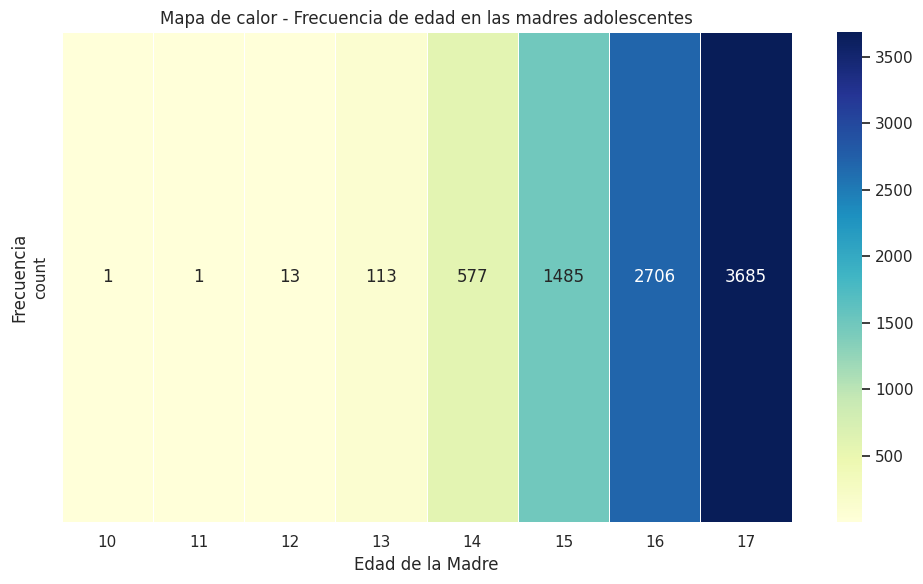

In [ ]:
# Ver los valores únicos
print("Valores únicos:")
print(df['EDAD_MADRE'].unique())

# Contar la frecuencia de cada valor
print("\nFrecuencia de cada valor:")
print(df['EDAD_MADRE'].value_counts())
sns.set(style="whitegrid")

edadmadre_counts = df['EDAD_MADRE'].value_counts().sort_index()

edadmadre_matrix = pd.DataFrame(edadmadre_counts).T

plt.figure(figsize=(10, 6))

sns.heatmap(edadmadre_matrix, annot=True, cmap="YlGnBu", fmt="d", cbar=True, linewidths=0.5)

plt.title('Mapa de calor - Frecuencia de edad en las madres adolescentes')
plt.xlabel('Edad de la Madre')
plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

**COLUMNA 10: EST_CIVM**

Valores únicos:
[5 2 1 6 9 4 3]

Frecuencia de cada valor:
EST_CIVM
5    3888
2    3122
1    1332
6     137
9      79
3      14
4       9
Name: count, dtype: int64


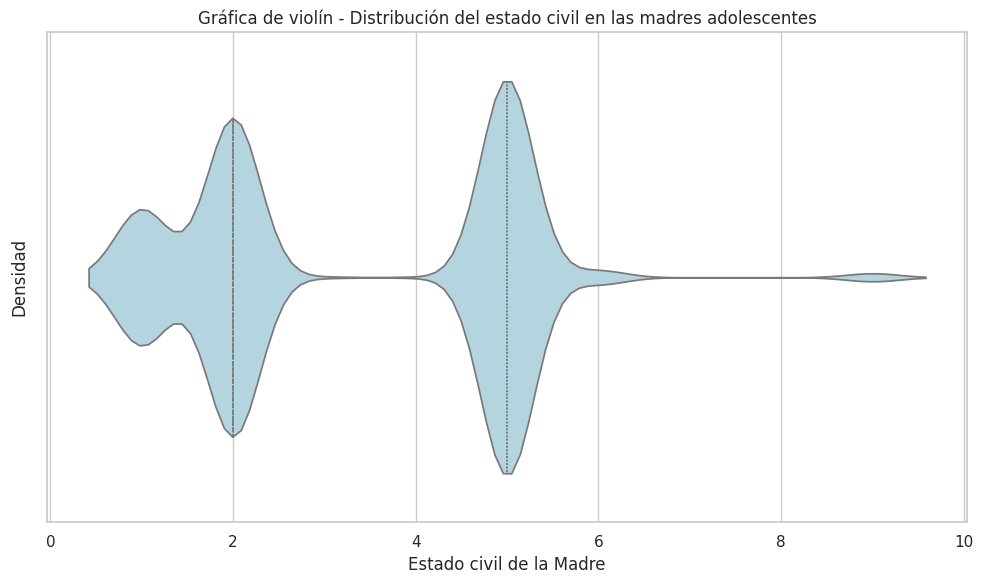

In [ ]:
sns.set(style="whitegrid")

# Ver los valores únicos
print("Valores únicos:")
print(df['EST_CIVM'].unique())

# Contar la frecuencia de cada valor
print("\nFrecuencia de cada valor:")
print(df['EST_CIVM'].value_counts())

'''
1 - Soltero(a)
2 - Casado(a)
3 - Divorciado(a)
4 - Viudo(a)
5 - Separado(a)
6 - Unión Libre
7 - No Especificado
8 - Otro
9 - Desconocido
'''

edadmadre_counts = df['EST_CIVM'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

sns.violinplot(x=df['EST_CIVM'], color="lightblue", inner="quartile")

plt.title('Gráfica de violín - Distribución del estado civil en las madres adolescentes')
plt.xlabel('Estado civil de la Madre')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

**COLUMNA 11: NIV_EDUM**

Valores únicos:
['Educación básica primaria' 'Educación básica secundaria'
 'Educación media' 'No registrado o dato faltante'
 'Educación técnica o tecnológica' 'Educación no especificada'
 'Educación preescolar' 'Doctorado' 'Maestría']

Frecuencia de cada valor:
NIV_EDUM
Educación básica secundaria        4664
Educación básica primaria          1914
Educación media                    1781
No registrado o dato faltante       124
Educación no especificada            42
Educación técnica o tecnológica      36
Educación preescolar                 16
Doctorado                             3
Maestría                              1
Name: count, dtype: int64


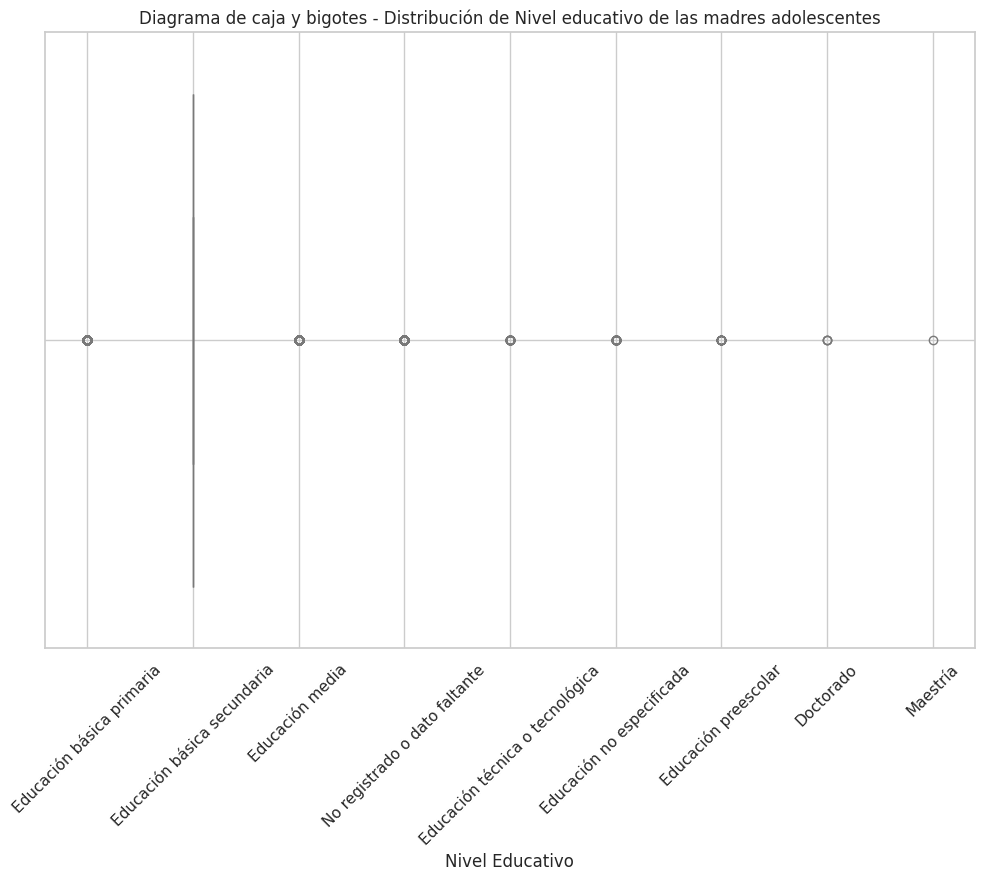

In [ ]:
niv_educativo_labels = {
    1: 'Educación preescolar',
    2: 'Educación básica primaria',
    3: 'Educación básica secundaria',
    4: 'Educación media',
    5: 'Educación técnica o tecnológica',
    6: 'Educación universitaria',
    7: 'Especialización',
    8: 'Maestría',
    9: 'Doctorado',
    10: 'Educación no especificada',
    11: 'Otro tipo de educación',
    12: 'Educación técnica o tecnológica avanzada',
    13: 'Educación a distancia o virtual',
    0: 'No registrado o dato faltante'
}

df['NIV_EDUM'] = df['NIV_EDUM'].map(niv_educativo_labels)

print("Valores únicos:")
print(df['NIV_EDUM'].unique())

print("\nFrecuencia de cada valor:")
print(df['NIV_EDUM'].value_counts())

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.boxplot(x=df['NIV_EDUM'], color="lightblue")

plt.title('Diagrama de caja y bigotes - Distribución de Nivel educativo de las madres adolescentes')
plt.xlabel('Nivel Educativo')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**COLUMA 12: AREA_RES**

Valores únicos:
['Rural' 'Urbana' 'Semirural']

Frecuencia de cada valor:
AREA_RES
Rural        5353
Semirural    2383
Urbana        845
Name: count, dtype: int64


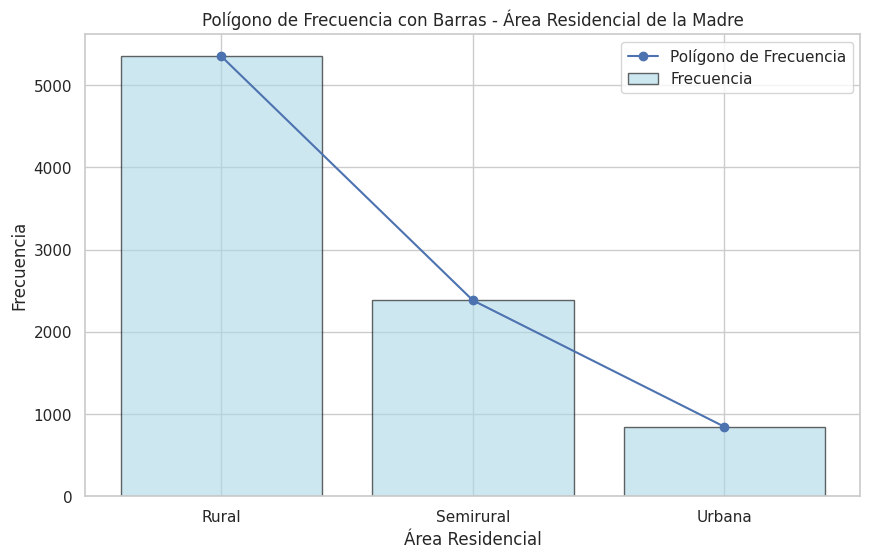

In [ ]:
area_residencial_labels = {
    1: 'Rural',
    2: 'Urbana',
    3: 'Semirural',
}

df['AREA_RES'] = df['AREA_RES'].map(area_residencial_labels)

print("Valores únicos:")
print(df['AREA_RES'].unique())

print("\nFrecuencia de cada valor:")
print(df['AREA_RES'].value_counts())

frequencias = df['AREA_RES'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.bar(frequencias.index, frequencias.values, color='lightblue', alpha=0.6, width=0.8, edgecolor='black', label='Frecuencia')

plt.plot(frequencias.index, frequencias.values, marker='o', linestyle='-', color='b', label='Polígono de Frecuencia')

plt.title('Polígono de Frecuencia con Barras - Área Residencial de la Madre')
plt.xlabel('Área Residencial')
plt.ylabel('Frecuencia')

plt.legend()

plt.grid(True)
plt.show()

**COLUMNA 13: N_HIJOSV**

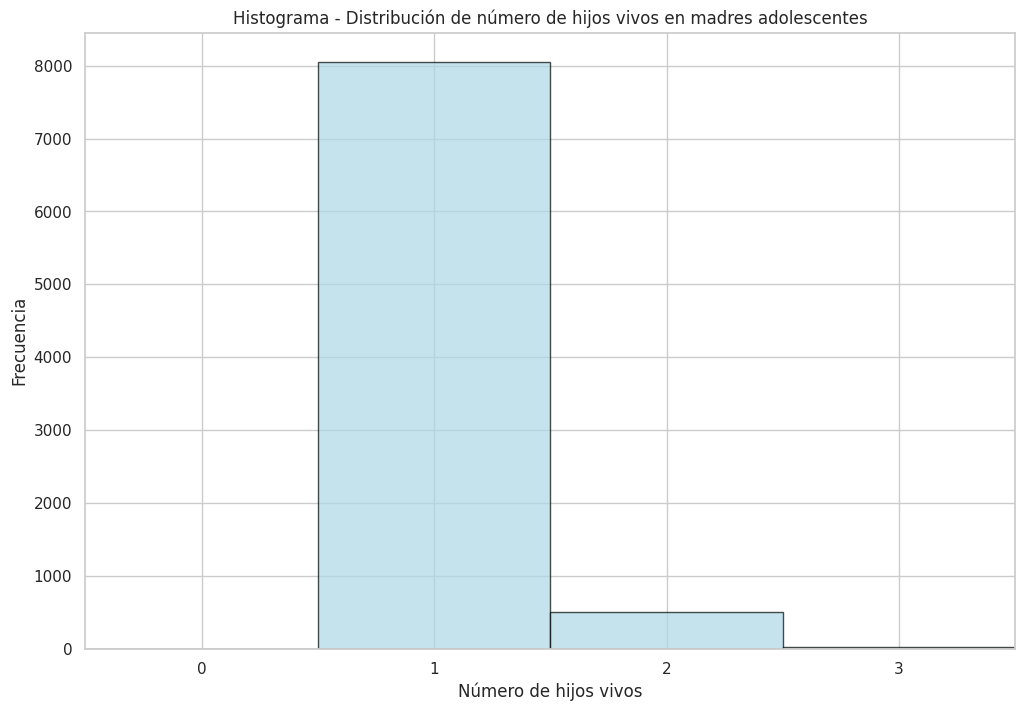

In [ ]:
NHIJOSV_counts = df['N_HIJOSV'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

# Crear el histograma
plt.hist(df['N_HIJOSV'], bins=np.arange(-0.5, 4.5, 1), color='lightblue', edgecolor='black', alpha=0.7)

plt.xlim(-0.5, 3.5)
plt.xticks(np.arange(0, 4, 1))  # Configurar los ticks del eje x para mostrar los valores enteros
plt.title('Histograma - Distribución de número de hijos vivos en madres adolescentes')
plt.xlabel('Número de hijos vivos')
plt.ylabel('Frecuencia')

plt.show()

**COLUMNA 14: N_EMB**

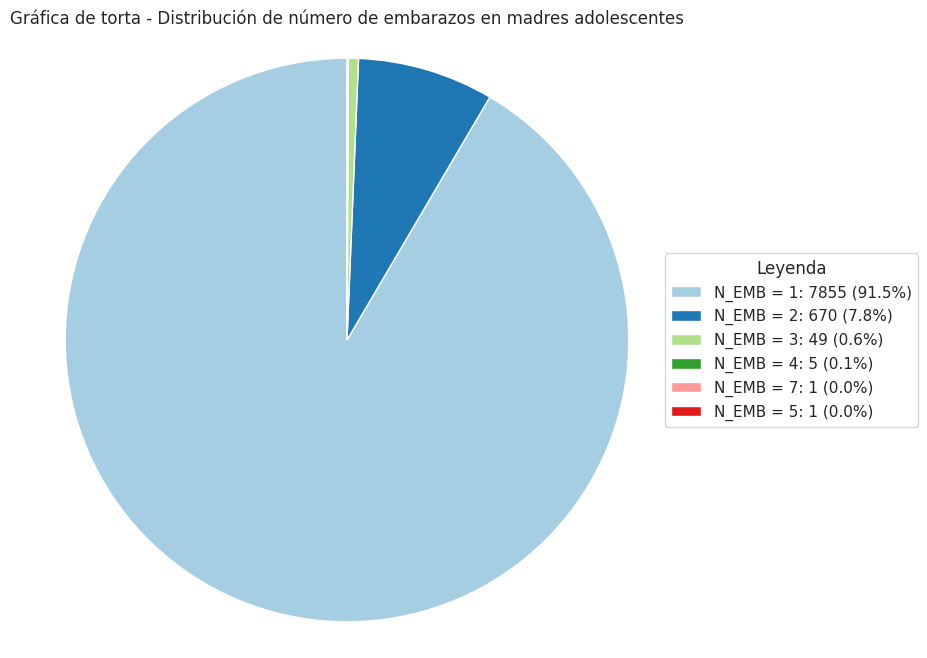

In [ ]:
NEMB_counts = df['N_EMB'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(NEMB_counts, startangle=90, colors=plt.cm.Paired.colors)

percentages = [f'{value} ({value/sum(NEMB_counts)*100:.1f}%)' for value in NEMB_counts]

plt.legend(wedges, [f'N_EMB = {label}: {percentage}' for label, percentage in zip(NEMB_counts.index, percentages)],
           title="Leyenda", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Gráfica de torta - Distribución de número de embarazos en madres adolescentes')
plt.axis('equal')
plt.show()

**COLUMNA 15: SEG_SOCIAL**

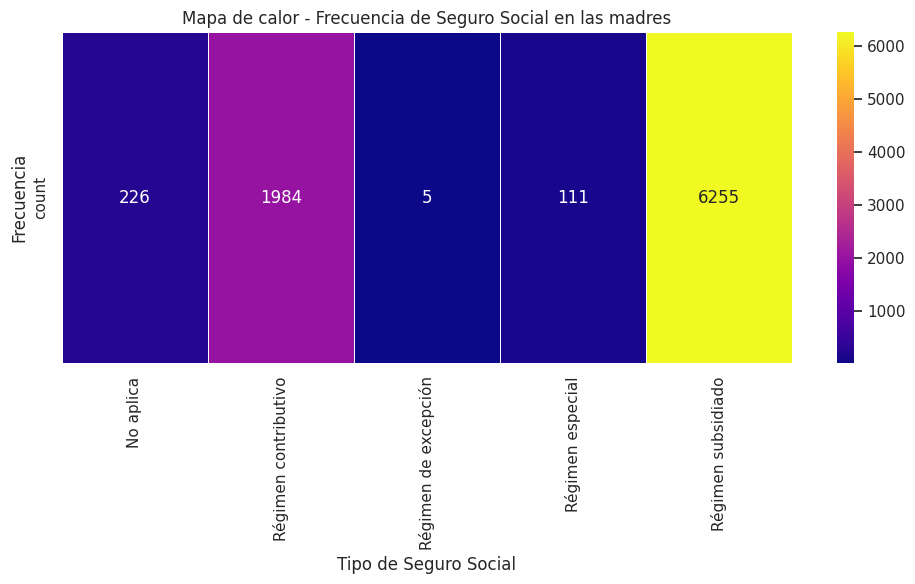

In [ ]:
seg_social_map = {1: 'Régimen contributivo', 2: 'Régimen subsidiado', 3: 'Régimen especial', 4: 'Régimen de excepción', 5: 'No aplica'}


df['SEG_SOCIAL_NOMBRES'] = df['SEG_SOCIAL'].map(seg_social_map)

segSocial_counts = df['SEG_SOCIAL_NOMBRES'].value_counts().sort_index()


segSocial_matrix = pd.DataFrame(segSocial_counts).T


plt.figure(figsize=(10, 6))
sns.heatmap(segSocial_matrix, annot=True, cmap="plasma", fmt="d", cbar=True, linewidths=0.5)

plt.title('Mapa de calor - Frecuencia de Seguro Social en las madres')
plt.xlabel('Tipo de Seguro Social')
plt.ylabel('Frecuencia')


plt.tight_layout()

plt.show()

**COLUMNA 16: EDAD_PADRE**

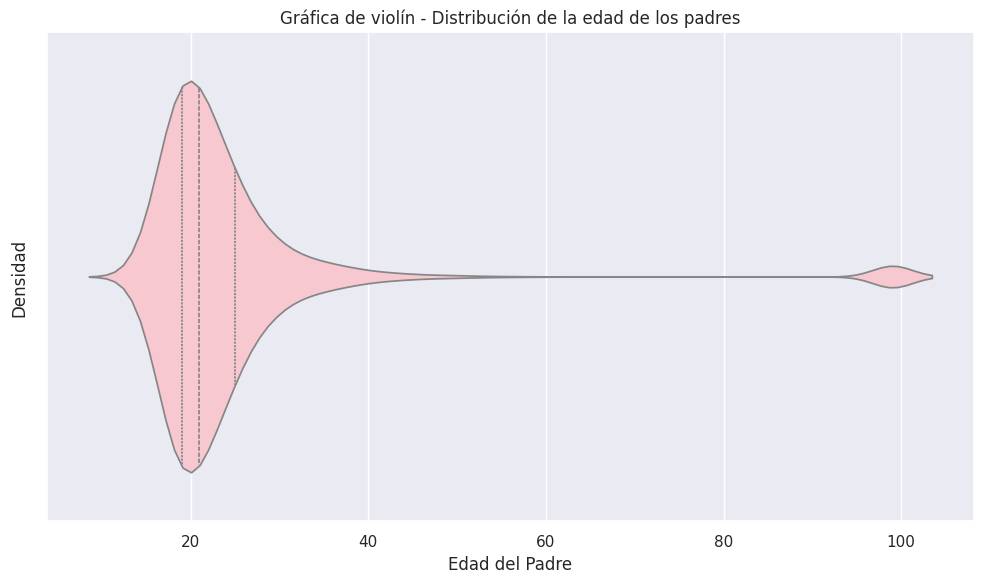

In [ ]:
sns.set(style="darkgrid")

edadmadre_counts = df['EDAD_PADRE'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

sns.violinplot(x=df['EDAD_PADRE'], color="pink", inner="quartile")

plt.title('Gráfica de violín - Distribución de la edad de los padres')
plt.xlabel('Edad del Padre')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

**COLUMNA 17: NIV_EDUP**

Valores únicos:
['No registrado o dato faltante' 'Educación media'
 'Educación básica secundaria' 'Educación básica primaria' 'Doctorado'
 'Educación preescolar' 'Educación a distancia o virtual'
 'Especialización' 'Maestría' 'Educación técnica o tecnológica'
 'Educación no especificada' 'Otro tipo de educación']

Frecuencia de cada valor:
NIV_EDUP
Educación media                    2499
Educación básica secundaria        2309
Educación básica primaria          1798
No registrado o dato faltante      1575
Educación a distancia o virtual     129
Doctorado                            98
Educación técnica o tecnológica      54
Especialización                      47
Maestría                             43
Educación preescolar                 26
Educación no especificada             2
Otro tipo de educación                1
Name: count, dtype: int64


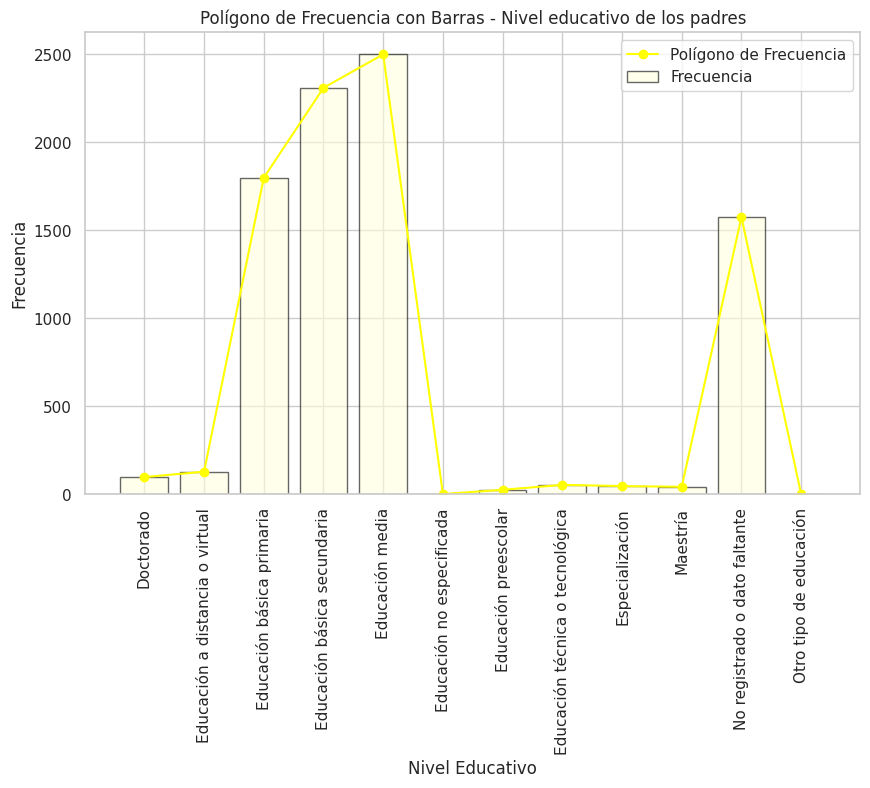

In [ ]:
niv_educativo_labels = {
    1: 'Educación preescolar',
    2: 'Educación básica primaria',
    3: 'Educación básica secundaria',
    4: 'Educación media',
    5: 'Educación técnica o tecnológica',
    6: 'Educación universitaria',
    7: 'Especialización',
    8: 'Maestría',
    9: 'Doctorado',
    10: 'Educación no especificada',
    11: 'Otro tipo de educación',
    12: 'Educación técnica o tecnológica avanzada',
    13: 'Educación a distancia o virtual',
    0: 'No registrado o dato faltante'
}

df['NIV_EDUP'] = df['NIV_EDUP'].map(niv_educativo_labels)

print("Valores únicos:")
print(df['NIV_EDUP'].unique())

print("\nFrecuencia de cada valor:")
print(df['NIV_EDUP'].value_counts())

frequencias = df['NIV_EDUP'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.bar(frequencias.index, frequencias.values, color='lightyellow', alpha=0.6, width=0.8, edgecolor='black', label='Frecuencia')

plt.plot(frequencias.index, frequencias.values, marker='o', linestyle='-', color='yellow', label='Polígono de Frecuencia')

plt.title('Polígono de Frecuencia con Barras - Nivel educativo de los padres')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')

plt.xticks(rotation=90)

plt.legend()

plt.grid(True)
plt.show()

**COLUMNA 18: PROFESION**

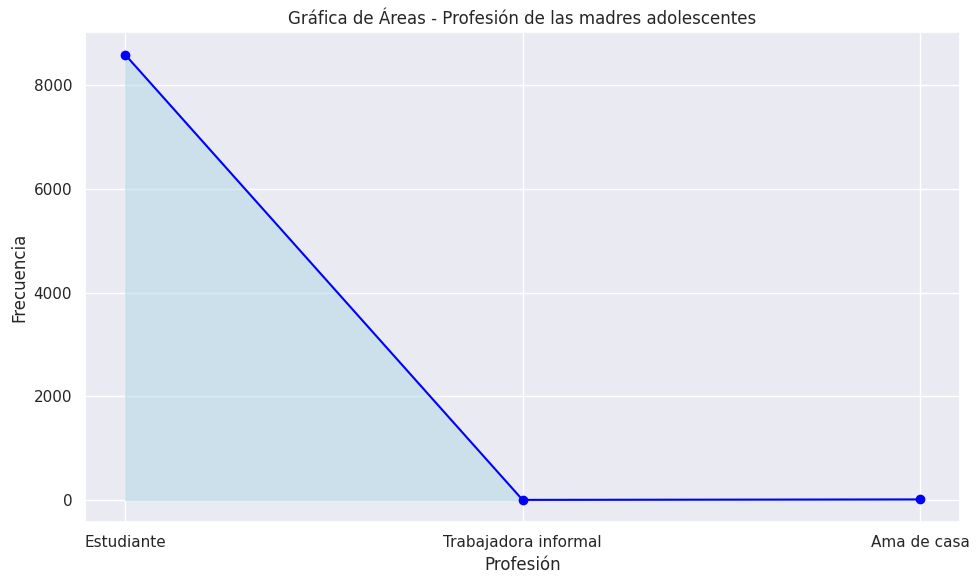

In [ ]:
profesion_counts = df['PROFESION'].value_counts().sort_index()

x = profesion_counts.index  # Valores de la profesión (1 al 5)
y = profesion_counts.values  # Frecuencias correspondientes

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666']

labels = {
    1: 'Estudiante',
    3: 'Trabajadora informal',
    5: 'Ama de casa'
}

min_area = 1
y_adjusted = np.maximum(y, min_area)

plt.figure(figsize=(10, 6))
plt.fill_between(x, y_adjusted, color='lightblue', alpha=0.5)
plt.plot(x, y_adjusted, color='blue', marker='o')

plt.title('Gráfica de Áreas - Profesión de las madres adolescentes')
plt.xlabel('Profesión')
plt.ylabel('Frecuencia')

plt.xticks(ticks=x, labels=[labels[i] for i in x])

plt.tight_layout()
plt.show()

# **APLICACIÓN DE CLASIFICACIÓN** <a name="eje7"></a>

##**TIPO_PARTO**

### **ESTIMADORES CON PARÁMETROS POR DEFECTO**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

np.random.seed(21)

# Suponiendo que df ya está cargado con las columnas adecuadas
X = df[["T_GES", "PESO_NAC", "TALLA_NAC", "EDAD_MADRE", "APGAR1", "APGAR2"]]
y = df['TIPO_PARTO']


# División de los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# SVC (Support Vector Classifier)
modelsvc = SVC()
modelsvc.fit(X_train, y_train)
y_pred_svc = modelsvc.predict(X_test)

# DecisionTreeClassifier
modeldtrc = DecisionTreeClassifier()
modeldtrc.fit(X_train, y_train)
y_pred_dtrc = modeldtrc.predict(X_test)

# RandomForestClassifier
modelrfrc = RandomForestClassifier()
modelrfrc.fit(X_train, y_train)
y_pred_rfrc = modelrfrc.predict(X_test)



print("Resultados de la clasificación con Decision Tree Classifier: ")
print("Accuracy: %.6f" % accuracy_score(y_test, y_pred_dtrc))
print("\n")
#print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_dtr))

print("Resultados de la clasificación con Random Forest Classifier: ")
print("Accuracy: %.6f" % accuracy_score(y_test, y_pred_rfrc))
#print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rfr))

# Evaluación de los modelos utilizando accuracy
print("Resultados de la clasificación con SVC: ")
print("Accuracy: %.6f" % accuracy_score(y_test, y_pred_svc))
print("\n")
#print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_svr))

Resultados de la clasificación con Decision Tree Classifier: 
Accuracy: 0.707630


Resultados de la clasificación con Random Forest Classifier: 
Accuracy: 0.776354
Resultados de la clasificación con SVC: 
Accuracy: 0.820035




Los modelos base (Decision Tree, Random Forest, SVC) se evaluaron con parámetros por defecto. El SVC mostró el mejor rendimiento inicial con un accuracy de 82%.

### **TUNNING DE PARÁMETROS: TRAIN_TEST_SPLIT**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

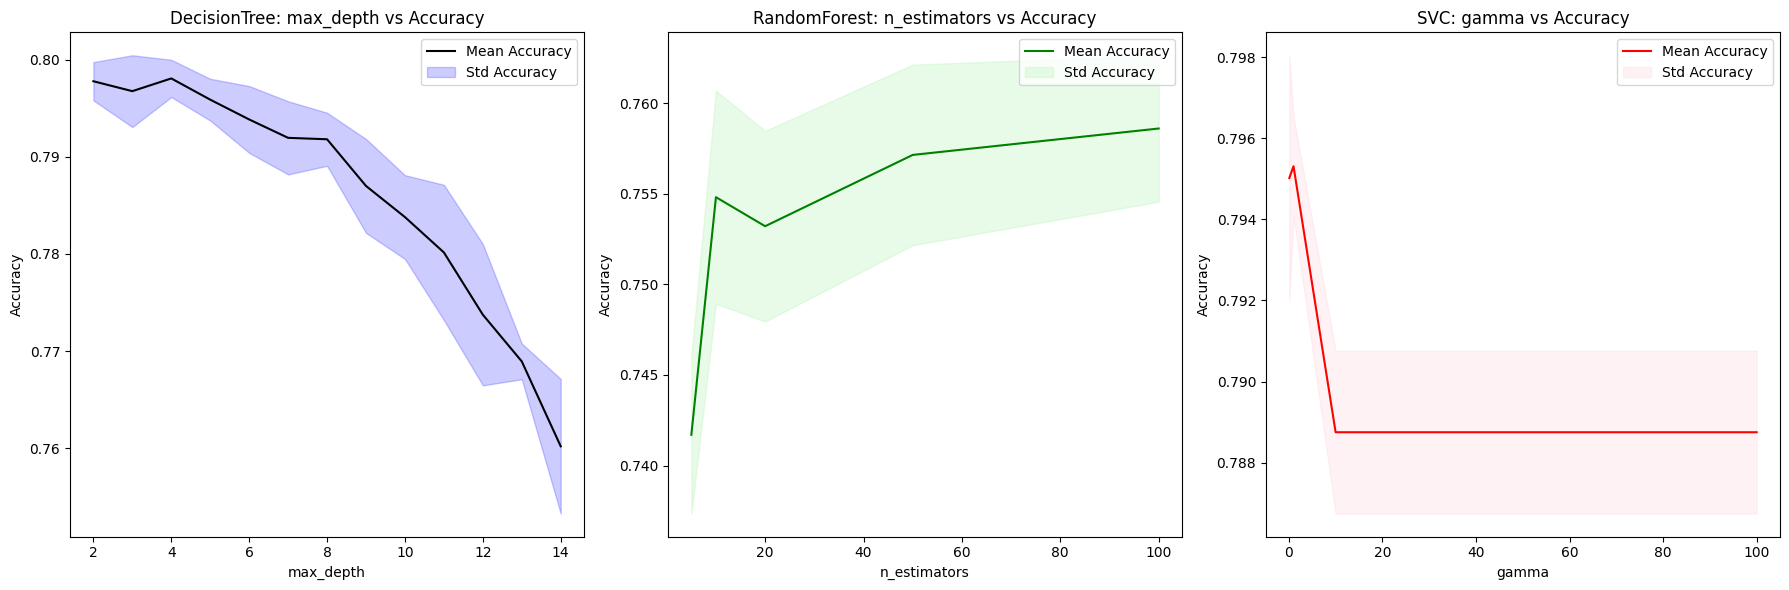

Best criterion for DecisionTreeClassifier: gini with Accuracy: 0.6909
Best criterion for RandomForestClassifier: gini with Accuracy: 0.7586


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def show_curve(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(18, 6))

    # 1. DecisionTreeClassifier - Variando max_depth
    max_depths = range(2, 15)
    dt_means, dt_stds = [], []
    for max_depth in max_depths:
        est = DecisionTreeClassifier(max_depth=max_depth)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='accuracy')
        dt_means.append(np.mean(scores))
        dt_stds.append(np.std(scores))

    plt.subplot(1, 3, 1)
    dt_means = np.array(dt_means)
    dt_stds = np.array(dt_stds)
    plt.plot(max_depths, dt_means, label="Mean Accuracy", color="black")
    plt.fill_between(max_depths, dt_means - dt_stds, dt_means + dt_stds, color="blue", alpha=0.2, label="Std Accuracy")
    plt.xlabel("max_depth")
    plt.ylabel("Accuracy")
    plt.title("DecisionTree: max_depth vs Accuracy")
    plt.legend()

    # 2. RandomForestClassifier - Variando n_estimators
    n_estimators_range = [5, 10, 20, 50, 100]
    rf_means, rf_stds = [], []
    for n_estimators in n_estimators_range:
        est = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='accuracy')
        rf_means.append(np.mean(scores))
        rf_stds.append(np.std(scores))

    plt.subplot(1, 3, 2)
    rf_means = np.array(rf_means)
    rf_stds = np.array(rf_stds)
    plt.plot(n_estimators_range, rf_means, label="Mean Accuracy", color="green")
    plt.fill_between(n_estimators_range, rf_means - rf_stds, rf_means + rf_stds, color="lightgreen", alpha=0.2, label="Std Accuracy")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.title("RandomForest: n_estimators vs Accuracy")
    plt.legend()

    gamma_range = [0.1, 1, 10, 100]
    svc_means, svc_stds = [], []
    for gamma in gamma_range:
        est = SVC(kernel='rbf', gamma=gamma)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='accuracy')
        svc_means.append(np.mean(scores))
        svc_stds.append(np.std(scores))

    plt.subplot(1, 3, 3)
    svc_means = np.array(svc_means)
    svc_stds = np.array(svc_stds)
    plt.plot(gamma_range, svc_means, label="Mean Accuracy", color="red")
    plt.fill_between(gamma_range, svc_means - svc_stds, svc_means + svc_stds, color="pink", alpha=0.2, label="Std Accuracy")
    plt.xlabel("gamma")
    plt.ylabel("Accuracy")
    plt.title("SVC: gamma vs Accuracy")
    plt.legend()

    # Evaluar el mejor criterio para DecisionTreeClassifier
    dt_criteria = ['gini', 'entropy']
    best_criterion_dt, best_accuracy_dt = None, 0
    for criterion in dt_criteria:
        est = DecisionTreeClassifier(criterion=criterion)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracy = np.mean(scores)
        if mean_accuracy > best_accuracy_dt:
            best_accuracy_dt = mean_accuracy
            best_criterion_dt = criterion

    rf_criteria = ['gini', 'entropy']
    best_criterion_rf, best_accuracy_rf = None, 0
    for criterion in rf_criteria:
        est = RandomForestClassifier(criterion=criterion, random_state=42)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracy = np.mean(scores)
        if mean_accuracy > best_accuracy_rf:
            best_accuracy_rf = mean_accuracy
            best_criterion_rf = criterion

    plt.tight_layout()
    plt.show()


    print(f"Best criterion for DecisionTreeClassifier: {best_criterion_dt} with Accuracy: {best_accuracy_dt:.4f}")
    print(f"Best criterion for RandomForestClassifier: {best_criterion_rf} with Accuracy: {best_accuracy_rf:.4f}")

show_curve(X_train, X_test, y_train, y_test)


### **TUNNING DE PARÁMETROS CON PARÁMETROS POR DEFECTO: CROSS_VAL_SCORE**

Support Vector - n_folds=2: Mean=0.8029376550583729, Std=0.008018055897338117
Support Vector - n_folds=3: Mean=0.8029369325769187, Std=0.003659218750755145
Support Vector - n_folds=4: Mean=0.8029354770734082, Std=0.00730930729276767
Support Vector - n_folds=5: Mean=0.8029373751854824, Std=0.015086061672950063
Support Vector - n_folds=6: Mean=0.8029358249484035, Std=0.007957734760018268
Support Vector - n_folds=7: Mean=0.8029379955198114, Std=0.009605085910603538
Support Vector - n_folds=8: Mean=0.8029376721355942, Std=0.00863724779965961
Support Vector - n_folds=9: Mean=0.802934888269515, Std=0.00614334401123493
Decision Tree - n_folds=2: Mean=0.6910619559885465, Std=0.002644337717747136
Decision Tree - n_folds=3: Mean=0.7066781872444229, Std=0.003999366512591806
Decision Tree - n_folds=4: Mean=0.698171368861024, Std=0.00610344140106127
Decision Tree - n_folds=5: Mean=0.6952549779864865, Std=0.011651379000748334
Decision Tree - n_folds=6: Mean=0.6979356539104966, Std=0.006619300693108


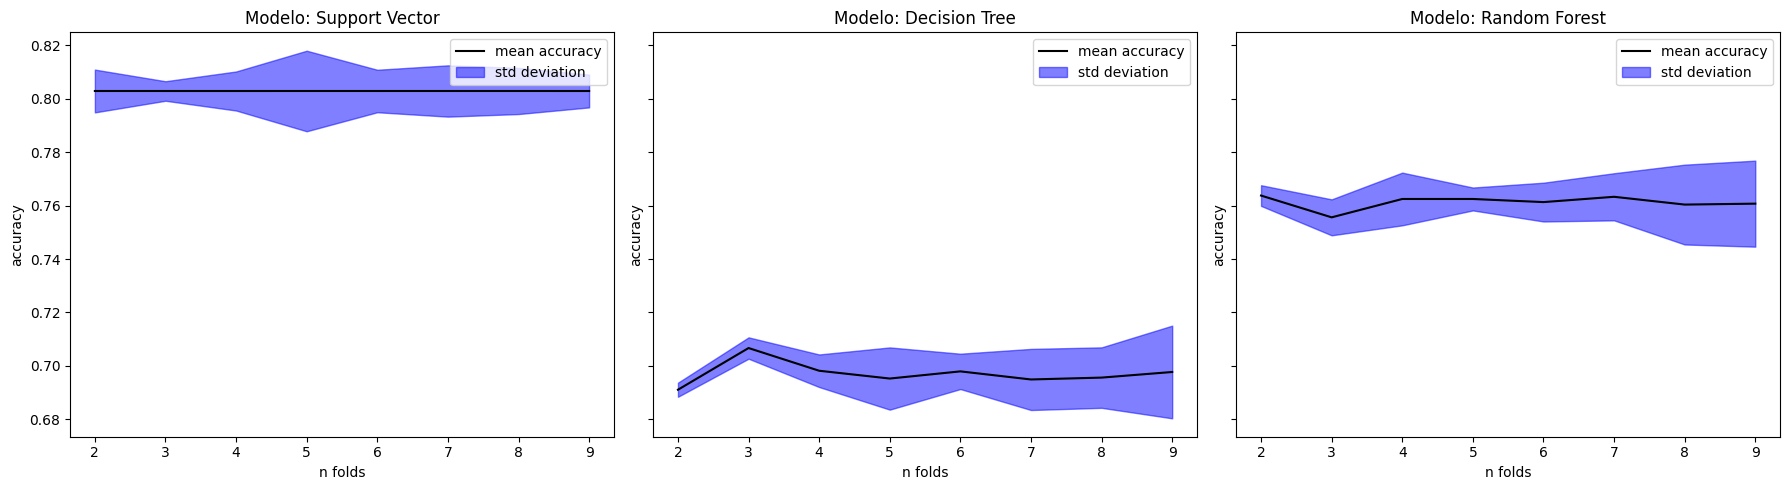

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import matplotlib.pyplot as plt


def show_curve(models):
    nfolds_range = range(2, 10)  # Rango de valores para el número de folds
    num_models = len(models)

    # Crear subplots, uno para cada modelo
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5), sharey=True)



    for ax, (model_name, est) in zip(axes, models.items()):
        means, stds = [], []

        for nfolds in nfolds_range:
            # Calcular el desempeño del modelo para el número de folds
            s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
            print(f"{model_name} - n_folds={nfolds}: Mean={np.mean(s)}, Std={np.std(s)}")
            means.append(np.mean(s))
            stds.append(np.std(s))

        means = np.r_[means]
        stds = np.r_[stds]

        # Plotear en el eje correspondiente
        ax.plot(nfolds_range, means, label="mean accuracy", color="black")
        ax.fill_between(nfolds_range, means - stds, means + stds, color="blue", alpha=0.5, label="std deviation")
        ax.set_xlabel("n folds")
        ax.set_ylabel("accuracy")
        ax.set_title(f"Modelo: {model_name}")
        ax.legend()

    plt.tight_layout()
    plt.show()

# Cambiar los modelos a clasificación
models = {
    "Support Vector": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Llamar a la función show_curve con los modelos adaptados a clasificación
show_curve(models)


A partir de las gráficas generadas durante el análisis de los clasificadores, se concluye lo siguiente:

1. **Support Vector Classifier (SVC):** \\
El rendimiento es muy estable a lo largo de los diferentes números de folds, con la precisión más alta observada en n_folds=7, con una media de 0.80294 y una desviación estándar relativamente baja. Esto sugiere que **7 folds** proporciona el mejor equilibrio entre precisión y estabilidad.

2. **Decision Tree Classifier:** \\
El rendimiento varía más considerablemente con los diferentes números de folds. El mejor rendimiento se obtiene con n_folds=3, donde la media de precisión alcanza 0.7067, con una desviación estándar baja. Esto indica que **3 folds** es el número de particiones que ofrece la mayor estabilidad y precisión para este modelo.

3. **Random Forest Classifier:** \\
Al igual que con el SVC, el rendimiento de Random Forest es relativamente estable, pero el mejor resultado se obtiene con n_folds=2, alcanzando una media de 0.76378, con una desviación estándar baja. Esto sugiere que **2 folds** es el número de particiones óptimo para este modelo.








### **DEEP LEARNING**

#### 3 capas

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras







model_3layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),  # Ajusta el input_shape
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Cambia 4 por el número de clases
])


model_3layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3layers.fit(X_train, y_train, epochs=13, verbose=1)
y_pred = model_3layers.predict(X_test, verbose=1)
test_loss, test_accuracy = model_3layers.evaluate(X_test, y_test)

print( 'Test_accuracy:', test_accuracy, " test_loss: ", test_loss)

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6357 - loss: 53.5846
Epoch 2/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6706 - loss: 6.1859
Epoch 3/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6795 - loss: 3.8494
Epoch 4/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6978 - loss: 1.0499
Epoch 5/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7116 - loss: 1.1577
Epoch 6/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7337 - loss: 0.9037
Epoch 7/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.9114
Epoch 8/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7109 - loss: 0.9222
Epoch 9/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7691 - loss: 0.6821
Epoch 10/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7523 - loss: 0.7131
Epoch 11/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.6103
Epoch 12/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

#### 6 capas

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_6layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model_6layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_6layers.fit(X_train, y_train, epochs=13, verbose=1)
y_pred = model_6layers.predict(X_test, verbose=1)
test_loss, test_accuracy = model_6layers.evaluate(X_test, y_test)

print( 'Test_accuracy:', test_accuracy, " test_loss: ", test_loss)

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6820 - loss: 17.9399
Epoch 2/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8013 - loss: 0.5908
Epoch 3/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7910 - loss: 0.6213
Epoch 4/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8011 - loss: 0.5614
Epoch 5/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8053 - loss: 0.5513
Epoch 6/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8005 - loss: 0.5616
Epoch 7/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8042 - loss: 0.5585
Epoch 8/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7965 - loss: 0.5669
Epoch 9/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7991 - loss: 0.5681
Epoch 10/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8011 - loss: 0.5613
Epoch 11/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7978 - loss: 0.5605
Epoch 12/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/st

#### 10 capas

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_10layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(unique_values, activation='softmax')
])


model_10layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_10layers.fit(X_train, y_train, epochs=13, verbose=1)
y_pred = model_10layers.predict(X_test, verbose=1)
test_loss, test_accuracy = model_10layers.evaluate(X_test, y_test)

print( 'Test_accuracy:', test_accuracy, " test_loss: ", test_loss)

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7173 - loss: 2.3305
Epoch 2/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8026 - loss: 0.5760
Epoch 3/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7963 - loss: 0.5691
Epoch 4/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7953 - loss: 0.5807
Epoch 5/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8045 - loss: 0.5626
Epoch 6/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7974 - loss: 0.5635
Epoch 7/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7997 - loss: 0.5669
Epoch 8/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8016 - loss: 0.5696
Epoch 9/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7939 - loss: 0.5711
Epoch 10/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7980 - loss: 0.5639
Epoch 11/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7955 - loss: 0.5673
Epoch 12/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accur

# **APLICACIÓN DE REGRESIÓN** <a name="eje8"></a>

##**APGAR1**

### **ESTIMADORES CON PARÁMETROS POR DEFECTO**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

np.random.seed(21)

X = df[["T_GES", "PESO_NAC", "TALLA_NAC", "EDAD_MADRE", "TIPO_PARTO"]]
y = df['APGAR1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#SVR
modelsvr = SVR()
modelsvr.fit(X_train, y_train)
y_pred_svr = modelsvr.predict(X_test)

#DecisionTreeRegressor
modeldtr = DecisionTreeRegressor()
modeldtr.fit(X_train, y_train)
y_pred_dtr = modeldtr.predict(X_test)

#RandomForestRegressor
modelrfr = RandomForestRegressor()
modelrfr.fit(X_train, y_train)
y_pred_rfr = modelrfr.predict(X_test)

print("Regresión aplicando SVR\n")
print("MSE: %.3f"% mean_squared_error(y_test, modelsvr.predict(X_test)))
print("RMSE: %.3f"% np.sqrt(mean_squared_error(y_test, modelsvr.predict(X_test))))
print("MAE: %.3f \n"% mean_absolute_error(y_test, modelsvr.predict(X_test)))

print("Regresión aplicando Decision Tree Regressor\n")
print("MSE: %.3f"% mean_squared_error(y_test, modeldtr.predict(X_test)))
print("RMSE:  %.3f"% np.sqrt(mean_squared_error(y_test, modeldtr.predict(X_test))))
print("MAE: %.3f \n"% mean_absolute_error(y_test, modeldtr.predict(X_test)))

print("Regresión aplicando Random Forest Regressor\n")
print("MSE:%.3f"% mean_squared_error(y_test, modelrfr.predict(X_test)))
print("RMSE:%.3f"% np.sqrt(mean_squared_error(y_test, modelrfr.predict(X_test))))
print("MAE: %.3f"% mean_absolute_error(y_test, modelrfr.predict(X_test)))


Regresión aplicando SVR

MSE: 1.409
RMSE: 1.187
MAE: 0.635 

Regresión aplicando Decision Tree Regressor

MSE: 2.402
RMSE:  1.550
MAE: 0.947 

Regresión aplicando Random Forest Regressor

MSE:1.552
RMSE:1.246
MAE: 0.805


Los modelos base (Decision Tree, Random Forest, SVR) se evaluaron con parámetros por defecto. El SVR mostró el mejor rendimiento inicial con un MSE de 1.409

### **TUNNING DE PARÁMETROS: TRAIN_TEST_SPLIT**

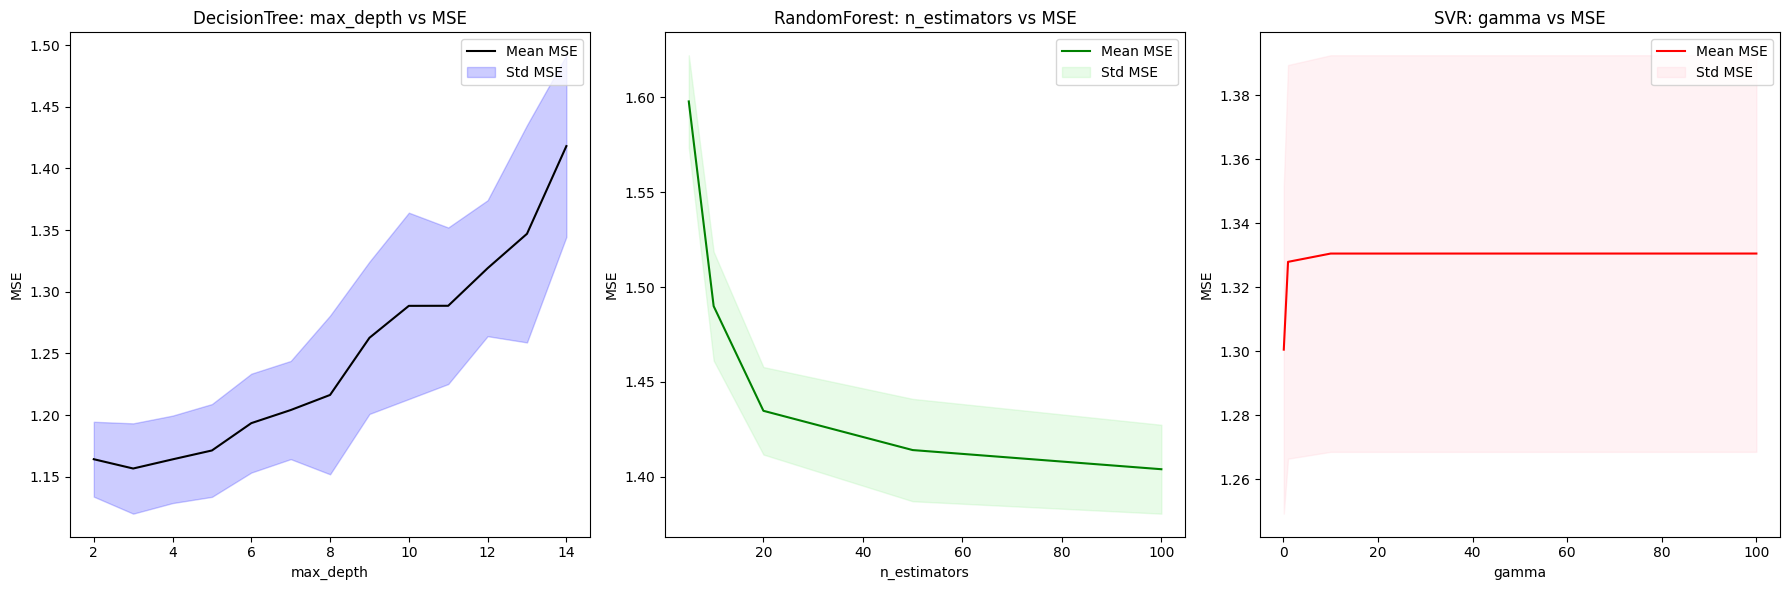

Best criterion for DecisionTreeRegressor: squared_error with MSE: 2.1667
Best criterion for RandomForestRegressor: squared_error with MSE: 1.4040


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def show_curve(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(18, 6))

    # 1. DecisionTreeRegressor - Variando max_depth
    max_depths = range(2, 15)
    dt_means, dt_stds = [], []
    for max_depth in max_depths:
        est = DecisionTreeRegressor(max_depth=max_depth)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        dt_means.append(-np.mean(scores))
        dt_stds.append(np.std(scores))

    plt.subplot(1, 3, 1)
    dt_means = np.array(dt_means)
    dt_stds = np.array(dt_stds)
    plt.plot(max_depths, dt_means, label="Mean MSE", color="black")
    plt.fill_between(max_depths, dt_means - dt_stds, dt_means + dt_stds, color="blue", alpha=0.2, label="Std MSE")
    plt.xlabel("max_depth")
    plt.ylabel("MSE")
    plt.title("DecisionTree: max_depth vs MSE")
    plt.legend()

    # 2. RandomForestRegressor - Variando n_estimators
    n_estimators_range = [5, 10, 20, 50, 100]
    rf_means, rf_stds = [], []
    for n_estimators in n_estimators_range:
        est = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rf_means.append(-np.mean(scores))
        rf_stds.append(np.std(scores))

    plt.subplot(1, 3, 2)
    rf_means = np.array(rf_means)
    rf_stds = np.array(rf_stds)
    plt.plot(n_estimators_range, rf_means, label="Mean MSE", color="green")
    plt.fill_between(n_estimators_range, rf_means - rf_stds, rf_means + rf_stds, color="lightgreen", alpha=0.2, label="Std MSE")
    plt.xlabel("n_estimators")
    plt.ylabel("MSE")
    plt.title("RandomForest: n_estimators vs MSE")
    plt.legend()

    # 3. SVR - Variando gamma
    gamma_range = [0.1, 1, 10, 100]
    svr_means, svr_stds = [], []
    for gamma in gamma_range:
        est = SVR(kernel='rbf', gamma=gamma)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        svr_means.append(-np.mean(scores))
        svr_stds.append(np.std(scores))

    plt.subplot(1, 3, 3)
    svr_means = np.array(svr_means)
    svr_stds = np.array(svr_stds)
    plt.plot(gamma_range, svr_means, label="Mean MSE", color="red")
    plt.fill_between(gamma_range, svr_means - svr_stds, svr_means + svr_stds, color="pink", alpha=0.2, label="Std MSE")
    plt.xlabel("gamma")
    plt.ylabel("MSE")
    plt.title("SVR: gamma vs MSE")
    plt.legend()

    # Evaluar el mejor criterio para DecisionTreeRegressor
    dt_criteria = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
    best_criterion_dt, best_mse_dt = None, float('inf')
    for criterion in dt_criteria:
        est = DecisionTreeRegressor(criterion=criterion)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_mse = -np.mean(scores)
        if mean_mse < best_mse_dt:
            best_mse_dt = mean_mse
            best_criterion_dt = criterion

    rf_criteria = ['squared_error', 'poisson']
    best_criterion_rf, best_mse_rf = None, float('inf')
    for criterion in rf_criteria:
        est = RandomForestRegressor(criterion=criterion, random_state=42)
        scores = cross_val_score(est, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_mse = -np.mean(scores)
        if mean_mse < best_mse_rf:
            best_mse_rf = mean_mse
            best_criterion_rf = criterion

    plt.tight_layout()
    plt.show()

    print(f"Best criterion for DecisionTreeRegressor: {best_criterion_dt} with MSE: {best_mse_dt:.4f}")
    print(f"Best criterion for RandomForestRegressor: {best_criterion_rf} with MSE: {best_mse_rf:.4f}")

show_curve(X_train, X_test, y_train, y_test)


### **TUNNING DE PARÁMETROS CON PARÁMETROS POR DEFECTO: CROSS_VAL_SCORE**

Support Vector - n_folds=2: Mean=1.245755658455011, Std=0.00806571723671623
Support Vector - n_folds=3: Mean=1.2385554919262949, Std=0.13611590851069633
Support Vector - n_folds=4: Mean=1.2367629945905023, Std=0.09309359079950452
Support Vector - n_folds=5: Mean=1.2339388873768378, Std=0.10256613212732403
Support Vector - n_folds=6: Mean=1.2362739252725023, Std=0.09750225368944897
Support Vector - n_folds=7: Mean=1.2341402489546893, Std=0.14211247118573841
Support Vector - n_folds=8: Mean=1.2342493893420357, Std=0.11425386863491681
Support Vector - n_folds=9: Mean=1.2344932836069438, Std=0.1631661525976273
Decision Tree - n_folds=2: Mean=2.45553676197075, Std=0.037448235174961875
Decision Tree - n_folds=3: Mean=2.2780370937670393, Std=0.10092150040911124
Decision Tree - n_folds=4: Mean=2.2649373453228074, Std=0.03325853940600441
Decision Tree - n_folds=5: Mean=2.341532513624046, Std=0.15748218729547606
Decision Tree - n_folds=6: Mean=2.2685996515084046, Std=0.1411084373788739
Decision 

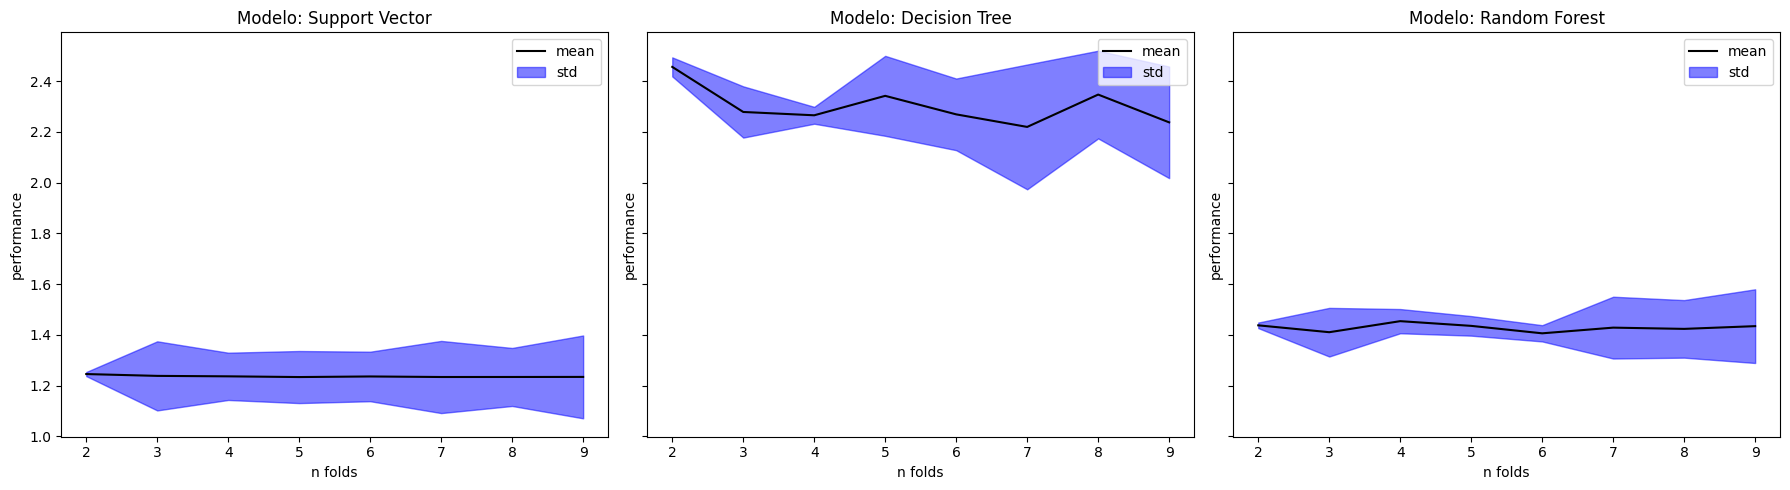

In [ ]:
def show_curve(models):
    nfolds_range = range(2, 10)
    num_models = len(models)

    # Crear subplots, uno para cada modelo
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5), sharey=True)

    if num_models == 1:  # Caso en que haya un solo modelo
        axes = [axes]

    for ax, (model_name, est) in zip(axes, models.items()):
        means, stds = [], []

        for nfolds in nfolds_range:
            # Calcular el desempeño del modelo para el número de folds
            s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
            print(f"{model_name} - n_folds={nfolds}: Mean={np.mean(s)}, Std={np.std(s)}")
            means.append(np.mean(s))
            stds.append(np.std(s))

        means = np.r_[means]
        stds = np.r_[stds]

        # Plotear en el eje correspondiente
        ax.plot(nfolds_range, means, label="mean", color="black")
        ax.fill_between(nfolds_range, means - stds, means + stds, color="blue", alpha=0.5, label="std")
        ax.set_xlabel("n folds")
        ax.set_ylabel("performance")
        ax.set_title(f"Modelo: {model_name}")
        ax.legend()

    plt.tight_layout()
    plt.show()

models = {
    "Support Vector": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

show_curve(models)


A partir de los resultados obtenidos del cross-validation para cada modelo, se puede hacer el siguiente análisis:

1. **Support Vector Machine (SVM):** \\
* El rendimiento del modelo SVM es consistente a medida que se incrementa el número de folds.
* La media MSE se mantiene relativamente estable entre 1.23 y 1.25.
* La mejor opción parece ser usar n_folds = 5, ya que ofrece una media de 1.23, con una desviación estándar moderada de 0.10, lo que sugiere un buen equilibrio entre precisión y estabilidad del modelo.

2. **Decision Tree:** \\
* Los valores de MSE son más altos, con un rango de 2.18 a 2.45.
* El modelo presenta una desviación estándar considerable, que va desde 0.03 hasta 0.25, lo que indica que el modelo es más sensible a los cambios en los datos de entrenamiento y podría ser más propenso a overfitting.
* El mejor rendimiento en términos de MSE se obtiene con n_folds = 7, con un MSE promedio de 2.22 y una desviación estándar de 0.25.
3. **Random Forest:**
* El MSE promedio oscila entre 1.41 y 1.45, lo que indica que el modelo tiene un buen rendimiento general.
* La desviación estándar se mantiene relativamente baja (0.03 a 0.12), lo que sugiere que el modelo es estable en su desempeño a través de los diferentes pliegues.
* El mejor valor se obtiene con n_folds = 6, con una media de 1.41 y una desviación estándar de 0.03, lo que refleja un modelo robusto y confiable.

###  Deep Learning Regresion


### 3 capas


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_3layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_3layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_3layers.fit(X_train, y_train, epochs=13, verbose=1)
y_pred = model_3layers.predict(X_test, verbose=1)
test_loss, test_mse = model_3layers.evaluate(X_test, y_test)

print( 'Test MSE:', test_mse, " test_loss: ", test_loss)

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5523.9229 - mae: 38.2155
Epoch 2/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0263 - mae: 1.2252
Epoch 3/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3070 - mae: 1.2831
Epoch 4/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7078 - mae: 1.1597
Epoch 5/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4839 - mae: 1.2734
Epoch 6/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9282 - mae: 1.2257
Epoch 7/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6718 - mae: 1.1606
Epoch 8/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9911 - mae: 1.2304
Epoch 9/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0032 - mae: 1.2417
Epoch 10/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4521 - mae: 1.5739
Epoch 11/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6206 - mae: 1.1345
Epoch 12/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5379 - mae: 1.5408
Epoch 13/13
215/215 ━━━━━━━━━━━━

### 6 capas


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_6layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_6layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_6layers.fit(X_train, y_train, epochs=13, verbose=1)
y_pred = model_6layers.predict(X_test, verbose=1)
test_loss, test_mse = model_6layers.evaluate(X_test, y_test)

print( 'Test MSE:', test_mse, " test_loss: ", test_loss)

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 6500.5654 - mae: 31.1029
Epoch 2/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 3.8513 - mae: 1.4449
Epoch 3/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 3.3305 - mae: 1.3120
Epoch 4/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 3.8158 - mae: 1.3650
Epoch 5/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.7716 - mae: 1.1751
Epoch 6/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3.8481 - mae: 1.4284
Epoch 7/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 3.1541 - mae: 1.2687
Epoch 8/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.8628 - mae: 1.2456
Epoch 9/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.2352 - mae: 1.3045
Epoch 10/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.2449 - mae: 1.0602
Epoch 11/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.5822 - mae: 1.0880
Epoch 12/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.6570 - mae: 1.0941
Epoch 13/13
215/215 

#### 10 capas

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model_10layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])


model_10layers.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_10layers.fit(X_train, y_train, epochs=13, verbose=1)
y_pred = model_10layers.predict(X_test, verbose=1)
test_loss, test_mse = model_10layers.evaluate(X_test, y_test)

print( 'Test MSE:', test_mse, " test_loss: ", test_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 19.5783 - mae: 2.6445
Epoch 2/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1091 - mae: 1.4269
Epoch 3/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8530 - mae: 1.2019
Epoch 4/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.7127 - mae: 1.1724
Epoch 5/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0084 - mae: 1.1772
Epoch 6/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.3024 - mae: 1.0897
Epoch 7/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.3244 - mae: 1.0657
Epoch 8/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4993 - mae: 1.0643
Epoch 9/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.3144 - mae: 1.0007
Epoch 10/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4943 - mae: 0.8114
Epoch 11/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.7799 - mae: 0.9141
Epoch 12/13
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.5398 - mae: 0.7855
Epoch 13/13
215/215 ━━